In [1]:
from tools import *
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import time
import random, math, copy

In [2]:
itemNum=50 #物品数目
Bin=[100,100] #箱子宽度与高度
ran=list(range(itemNum))

# N5

In [3]:

N5 = [
    [25, 10],
    [74, 8],
    [27, 19],
    [64, 34],
    [74, 6],
    [39, 6],
    [48, 7],
    [11, 10],
    [8, 10],
    [14, 6],
    [6, 10],
    [26, 6],
    [27, 6],
    [6, 10],
    [8, 10],
    [31, 10],
    [23, 6],
    [7, 10],
    [6, 10],
    [11, 10],
    [53, 7],
    [20, 6],
    [46, 10],
    [18, 6],
    [10, 6],
    [10, 10],
    [9, 6],
    [7, 6],
    [11, 6],
    [7, 6],
    [6, 8],
    [9, 7],
    [47, 7],
    [10, 7],
    [7, 6],
    [25, 10],
    [26, 8],
    [36, 6],
    [6, 6],
    [6, 7],
    [20, 6],
    [16, 22],
    [20, 14],
    [10, 6],
    [14, 8],
    [8, 6],
    [7, 6],
    [16, 6],
    [8, 6],
    [15, 6]
]

AllItem = np.array(N5)

print(AllItem)


[[25 10]
 [74  8]
 [27 19]
 [64 34]
 [74  6]
 [39  6]
 [48  7]
 [11 10]
 [ 8 10]
 [14  6]
 [ 6 10]
 [26  6]
 [27  6]
 [ 6 10]
 [ 8 10]
 [31 10]
 [23  6]
 [ 7 10]
 [ 6 10]
 [11 10]
 [53  7]
 [20  6]
 [46 10]
 [18  6]
 [10  6]
 [10 10]
 [ 9  6]
 [ 7  6]
 [11  6]
 [ 7  6]
 [ 6  8]
 [ 9  7]
 [47  7]
 [10  7]
 [ 7  6]
 [25 10]
 [26  8]
 [36  6]
 [ 6  6]
 [ 6  7]
 [20  6]
 [16 22]
 [20 14]
 [10  6]
 [14  8]
 [ 8  6]
 [ 7  6]
 [16  6]
 [ 8  6]
 [15  6]]


# Bottom-Left

utilisation: 0.6999


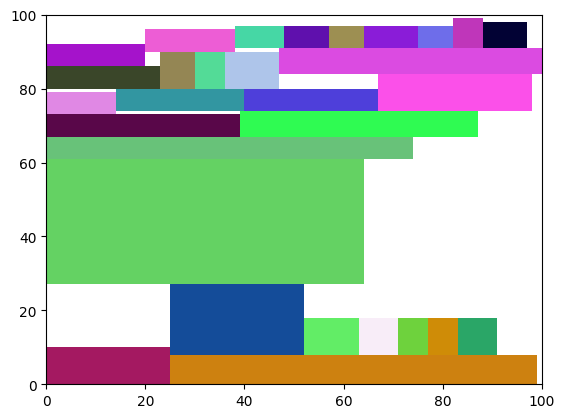

utilisation: 0.3001


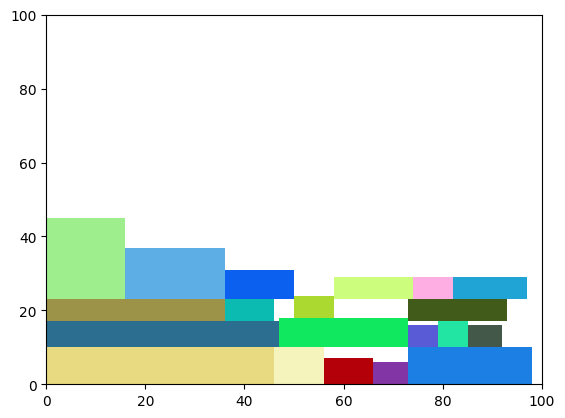

Average utilisation: 0.5
Running time: 0.28500890731811523 seconds


In [6]:
def bottom_left(itemNum, AllItem, Bin):
    ran = list(range(itemNum))

    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # start packing
    #print(list(flagItem).count(0))
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  #The starting points are all at the top right corner of the bin.
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) #If overlap flagOL=1; vice versa flagOL=0
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) #Update the coordinates of the top-right corner vertex of the item after moving it down and left from its current position to its final position.
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) # Record the rectangle that fits into the box [ID,width,height].
                        flagItem[ran[j]]=1

            #utilisation
            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            #visualisation
            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))

# BL(bottom-left) Sorted by height

utilisation: 0.847


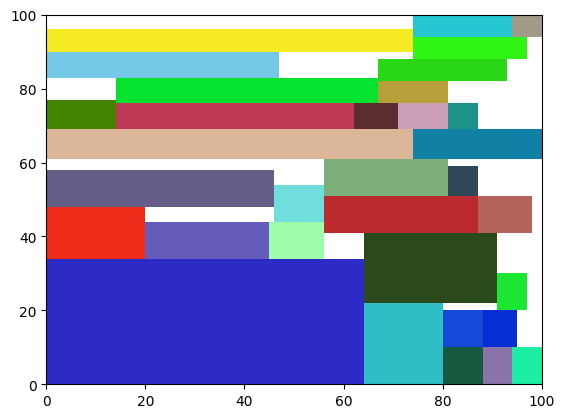

utilisation: 0.153


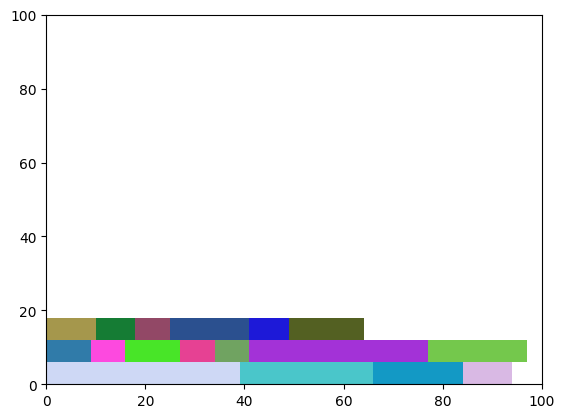

Average utilisation: 0.5
Running time: 0.2550010681152344 seconds


In [12]:
def bottom_left_sorted(itemNum, AllItem, Bin):
    ran = list(range(itemNum))
#     ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
    ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
#     ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing


    # Start packing.
    for i in range(itemNum):            
        if list(flagItem).count(0)>0:
            BinNum=BinNum+1
            RPNXY=[]
            for j in range(itemNum):
                if flagItem[ran[j]]==0:
                    item=AllItem[ran[j],:]
                    #print(item)
                    itemRP=Bin  
                    flagOL=overlap(item,AllItem,itemRP,RPNXY) 
                    if flagOL==0:
                        itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                        RPNXY.append([ran[j],itemRP[0],itemRP[1]]) 
                        flagItem[ran[j]]=1

            rect_area = 0
            bin_area = Bin[0]*Bin[1]
            for id in RPNXY:
                width,height = AllItem[id[0]]
                rect_area += width*height
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width,height = AllItem[i[0]]
                rx,ry = i[1],i[2]
                lx,ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            #plt.savefig('result.png')
            
    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_sorted(itemNum, AllItem, Bin)
end_time = time.time()


print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))
        

# Bottom-left-fill (BLF) algorithm

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
utilisation: 0.9193


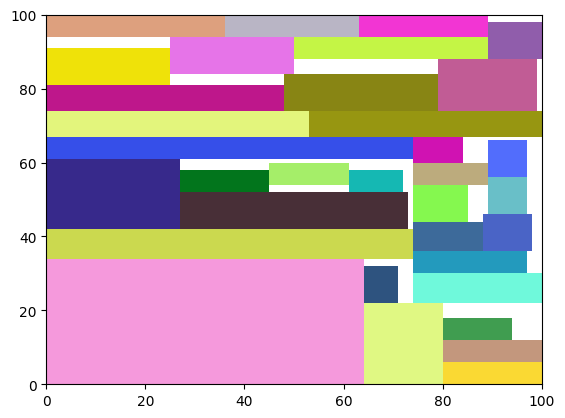

[[1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
utilisation: 0.0807


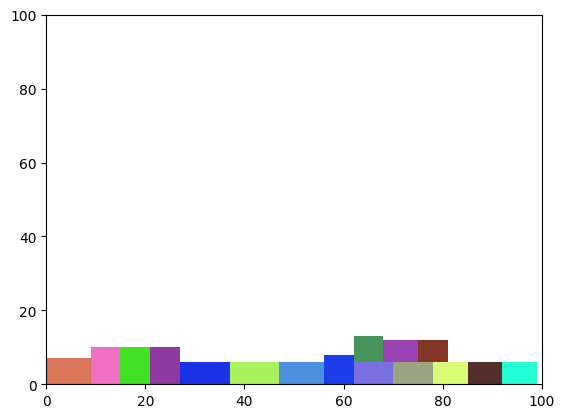

Average utilisation: 0.5
Running time: 0.6710031032562256 seconds


In [18]:
bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)  # Initially a 0 matrix, representing an empty bin
def find_largest_blank_region(bin_matrix):
    rows, cols = bin_matrix.shape
    max_width, max_height, max_area = 0, 0, 0
    start_row, start_col = 0, 0

    for r in range(rows):
        for c in range(cols):
            if bin_matrix[r, c] == 0:
                width, height = 0, 0
                while c + width < cols and bin_matrix[r, c + width] == 0:
                    width += 1
                while r + height < rows and bin_matrix[r + height, c] == 0:
                    height += 1
                area = width * height

                if area > max_area:
                    max_width, max_height, max_area = width, height, area
                    start_row, start_col = r, c

    return start_row, start_col, max_width, max_height

def bottom_left_fill(itemNum, AllItem, Bin, bin_matrix):
    ran = list(range(itemNum))
    ran.sort(key=lambda x: AllItem[x][0] * AllItem[x][1], reverse=True)  # Sort items by area (width * height)
#     ran.sort(key=lambda x: AllItem[x][1], reverse=True)  # Sort items by height in descending order
#     ran.sort(key=lambda x: (AllItem[x][1], AllItem[x][0] * AllItem[x][1]), reverse=True)
    ansBXY = np.zeros((itemNum, 3))  # [bin number, X coordinate, Y coordinate]
    RPNXY = []
    BinNum = 1
    flagItem = np.zeros(itemNum)  # Marks if an item is packed (0: not packed, 1: packed)
    utilization_rates = []  # Save the utilization rate for each packing
    visualizations = []  # Save visualizations of each packing

    for i in range(itemNum):
        if list(flagItem).count(0) > 0:
            BinNum = BinNum + 1
            RPNXY = []
            bin_matrix = np.zeros((Bin[1], Bin[0]), dtype=int)
            for j in range(itemNum):
                if flagItem[ran[j]] == 0:
                    item = AllItem[ran[j], :]
                    itemRP = Bin  
                    flagOL = overlap(item, AllItem, itemRP, RPNXY)  
                    if flagOL == 0:
                        itemRP = finalPos(item, AllItem, itemRP, RPNXY)  
                        RPNXY.append([ran[j], itemRP[0], itemRP[1]])  
                        flagItem[ran[j]] = 1

                        # Update bin matrix with occupied areas of the item
                        width, height = item
                        lx, ly = itemRP[0] - width, itemRP[1] - height
                        bin_matrix[ly:itemRP[1], lx:itemRP[0]] += 1
            print(bin_matrix)

            # Find and try to place remaining items in the blank regions
            while True:
                start_row, start_col, max_width, max_height = find_largest_blank_region(bin_matrix)
                if max_width < 1 or max_height < 1:
                    break

                # Check if any remaining item can fit in the largest blank region
                remaining_items = [ran[j] for j in range(itemNum) if flagItem[ran[j]] == 0]
                item_placed = False
                for j in remaining_items:
                    width, height = AllItem[j, :]
                    if width <= max_width and height <= max_height:
                        # Temporarily place the item in the largest blank region
                        bin_matrix[start_row:start_row + height, start_col:start_col + width] += 1
                        RPNXY.append([j, start_col + width, start_row + height])  # 记录装进箱子的矩形【ID,width,height】
                        flagItem[j] = 1
                        item_placed = True
                        break

                # Check if the bin matrix is still valid (all values <= 1)
                if np.max(bin_matrix) <= 1:
                    if not item_placed:
                        break
                else:
                    # Roll back to the previous state and remove the last item placement
                    bin_matrix[start_row:start_row + max_height, start_col:start_col + max_width] = 0
                    RPNXY.pop()

            rect_area = np.sum(bin_matrix)  # Count the number of occupied cells (ones) in the bin_matrix
            bin_area = np.prod(Bin)  # Total number of cells in the bin_matrix
            utilization_rate = rect_area / bin_area
            utilization_rates.append(utilization_rate)

            fig, ax = plt.subplots(1, 1)
            ax1 = fig.gca()
            for i in RPNXY:
                width, height = AllItem[i[0]]
                rx, ry = i[1], i[2]
                lx, ly = rx - width, ry - height
                plt.xlim((0, Bin[0]))
                plt.ylim((0, Bin[1]))
                color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                rect = patches.Rectangle((lx, ly), width, height, linewidth=1, facecolor=color)
                ax1.add_patch(rect)
            print("utilisation: {}".format(utilization_rate))
            plt.show()
            # plt.savefig('result.png')

    return utilization_rates

start_time = time.time()
# Run the Bottom-left-fill (BLF) algorithm
utilization_rates = bottom_left_fill(itemNum, AllItem, Bin, bin_matrix)
end_time = time.time()

print("Average utilisation: {}".format(np.mean(utilization_rates)))
print("Running time: {} seconds".format(end_time - start_time))


# LLABF

# ABC with BL

utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.8307
utilisation:0.8192
utilisation:0.7299
utilisation:0.7311
utilisation:0.8677
utilisation:0.8005
utilisation:0.7733
utilisation:0.7651
utilisation:0.7133
utilisation:0.7472
utilisation:0.7084
utilisation:0.7306
utilisation:0.7667
utilisation:0.7544
utilisation:0.7764
utilisation:0.743
utilisation:0.7453
utilisation:0.8337
utilisation:0.7061
utilisation:0.7222
utilisation:0.7637
utilisation:0.7328
utilisation:0

utilisation:0.8109
utilisation:0.7741
utilisation:0.782
utilisation:0.7953
utilisation:0.7379
utilisation:0.7033
utilisation:0.6426
utilisation:0.8139
utilisation:0.7781
utilisation:0.7472
utilisation:0.7124
utilisation:0.7348
utilisation:0.7321
utilisation:0.8397
utilisation:0.7926
utilisation:0.7552
utilisation:0.672
utilisation:0.8115
utilisation:0.6996
utilisation:0.8054
utilisation:0.7723
utilisation:0.7392
utilisation:0.784
utilisation:0.6623
utilisation:0.7514
utilisation:0.7472
utilisation:0.7824
utilisation:0.7655
utilisation:0.7456
utilisation:0.7905
utilisation:0.75
utilisation:0.759
utilisation:0.7807
utilisation:0.7824
utilisation:0.799
utilisation:0.707
utilisation:0.7694
utilisation:0.8061
utilisation:0.8114
utilisation:0.7602
utilisation:0.7879
utilisation:0.8347
utilisation:0.7655
utilisation:0.7081
utilisation:0.7411
utilisation:0.7165
utilisation:0.8187
utilisation:0.7824
utilisation:0.7293
utilisation:0.7269
utilisation:0.8261
utilisation:0.7866
utilisation:0.7472
u

utilisation:0.7859
utilisation:0.8347
utilisation:0.8058
utilisation:0.759
utilisation:0.7468
utilisation:0.8324
utilisation:0.8274
utilisation:0.8453
utilisation:0.7514
utilisation:0.738
utilisation:0.7824
utilisation:0.7175
utilisation:0.7472
utilisation:0.6871
utilisation:0.7824
utilisation:0.7816
utilisation:0.7244
utilisation:0.7824
utilisation:0.738
utilisation:0.7987
utilisation:0.7109
utilisation:0.8486
utilisation:0.6691
utilisation:0.8052
utilisation:0.7316
utilisation:0.8802
utilisation:0.8312
utilisation:0.781
utilisation:0.7902
utilisation:0.7126
utilisation:0.7861
utilisation:0.8157
utilisation:0.7422
utilisation:0.805
utilisation:0.8338
utilisation:0.8003
utilisation:0.7502
utilisation:0.6994
utilisation:0.7514
utilisation:0.697
utilisation:0.7663
utilisation:0.696
utilisation:0.7711
utilisation:0.8545
utilisation:0.7686
utilisation:0.8099
utilisation:0.7316
utilisation:0.8058
utilisation:0.7614
utilisation:0.8158
utilisation:0.67
utilisation:0.7967
utilisation:0.7186
ut

utilisation:0.7514
utilisation:0.6834
utilisation:0.7364
utilisation:0.7109
utilisation:0.8542
utilisation:0.7119
utilisation:0.7804
utilisation:0.7311
utilisation:0.7714
utilisation:0.7311
utilisation:0.6861
utilisation:0.7754
utilisation:0.7927
utilisation:0.8225
utilisation:0.7905
utilisation:0.6544
utilisation:0.7843
utilisation:0.7472
utilisation:0.8224
utilisation:0.7603
utilisation:0.8299
utilisation:0.7149
utilisation:0.7472
utilisation:0.7824
utilisation:0.6867
utilisation:0.7082
utilisation:0.738
utilisation:0.6959
utilisation:0.8611
utilisation:0.7354
utilisation:0.7514
utilisation:0.7324
utilisation:0.8068
utilisation:0.829
utilisation:0.7084
utilisation:0.6918
utilisation:0.82
utilisation:0.7579
utilisation:0.7824
utilisation:0.8444
utilisation:0.7574
utilisation:0.8317
utilisation:0.688
utilisation:0.7076
utilisation:0.7871
utilisation:0.8323
utilisation:0.7662
utilisation:0.6905
utilisation:0.7367
utilisation:0.7989
utilisation:0.8061
utilisation:0.6218
utilisation:0.729

utilisation:0.8003
utilisation:0.7824
utilisation:0.7824
utilisation:0.7311
utilisation:0.7364
utilisation:0.7829
utilisation:0.7514
utilisation:0.7652
utilisation:0.7756
utilisation:0.8318
utilisation:0.8212
utilisation:0.7943
utilisation:0.7861
utilisation:0.8193
utilisation:0.8008
utilisation:0.7552
utilisation:0.748
utilisation:0.7575
utilisation:0.7333
utilisation:0.7541
utilisation:0.7679
utilisation:0.6959
utilisation:0.8173
utilisation:0.7704
utilisation:0.7454
utilisation:0.7083
utilisation:0.7201
utilisation:0.796
utilisation:0.7761
utilisation:0.8019
utilisation:0.741
utilisation:0.8151
utilisation:0.8198
utilisation:0.7232
utilisation:0.751
utilisation:0.7589
utilisation:0.8249
utilisation:0.7607
utilisation:0.7366
utilisation:0.8055
utilisation:0.7688
utilisation:0.7824
utilisation:0.6405
utilisation:0.6677
utilisation:0.7311
utilisation:0.8073
utilisation:0.8105
utilisation:0.7296
utilisation:0.7725
utilisation:0.8153
utilisation:0.7084
utilisation:0.8124
utilisation:0.74

utilisation:0.8319
utilisation:0.7992
utilisation:0.7162
utilisation:0.793
utilisation:0.8129
utilisation:0.7848
utilisation:0.7443
utilisation:0.7937
utilisation:0.7406
utilisation:0.7659
utilisation:0.6659
utilisation:0.8431
utilisation:0.8389
utilisation:0.8174
utilisation:0.7393
utilisation:0.7668
utilisation:0.7107
utilisation:0.7857
utilisation:0.8172
utilisation:0.7719
utilisation:0.8469
utilisation:0.7499
utilisation:0.728
utilisation:0.7672
utilisation:0.7571
utilisation:0.8158
utilisation:0.865
utilisation:0.7734
utilisation:0.7687
utilisation:0.6948
utilisation:0.7388
utilisation:0.7841
utilisation:0.8191
utilisation:0.7957
utilisation:0.8125
utilisation:0.7102
utilisation:0.7374
utilisation:0.83
utilisation:0.7311
utilisation:0.7923
utilisation:0.7474
utilisation:0.7824
utilisation:0.8351
utilisation:0.7651
utilisation:0.7894
utilisation:0.6959
utilisation:0.7364
utilisation:0.832
utilisation:0.7597
utilisation:0.7794
utilisation:0.7964
utilisation:0.7824
utilisation:0.6981

utilisation:0.7324
utilisation:0.7509
utilisation:0.7716
utilisation:0.7914
utilisation:0.7749
utilisation:0.7294
utilisation:0.7824
utilisation:0.7364
utilisation:0.7933
utilisation:0.7237
utilisation:0.7246
utilisation:0.6821
utilisation:0.7824
utilisation:0.7388
utilisation:0.8168
utilisation:0.7782
utilisation:0.6922
utilisation:0.7707
utilisation:0.7202
utilisation:0.7657
utilisation:0.7608
utilisation:0.7222
utilisation:0.7744
utilisation:0.7152
utilisation:0.794
utilisation:0.7648
utilisation:0.8055
utilisation:0.773
utilisation:0.8188
utilisation:0.6982
utilisation:0.7185
utilisation:0.7824
utilisation:0.8129
utilisation:0.872
utilisation:0.7377
utilisation:0.7472
utilisation:0.8039
utilisation:0.606
utilisation:0.7306
utilisation:0.819
utilisation:0.7952
utilisation:0.8365
utilisation:0.7311
utilisation:0.8076
utilisation:0.7236
utilisation:0.7394
utilisation:0.7485
utilisation:0.7917
utilisation:0.7903
utilisation:0.7232
utilisation:0.8066
utilisation:0.8219
utilisation:0.761

utilisation:0.693
utilisation:0.7583
utilisation:0.7028
utilisation:0.7709
utilisation:0.7232
utilisation:0.8207
utilisation:0.8302
utilisation:0.7164
utilisation:0.8082
utilisation:0.8128
utilisation:0.828
utilisation:0.8631
utilisation:0.7824
utilisation:0.7428
utilisation:0.8487
utilisation:0.8341
utilisation:0.7144
utilisation:0.7801
utilisation:0.7099
utilisation:0.7993
utilisation:0.7514
utilisation:0.8501
utilisation:0.7472
utilisation:0.8366
utilisation:0.7866
utilisation:0.7728
utilisation:0.7468
utilisation:0.8207
utilisation:0.7514
utilisation:0.7472
utilisation:0.7914
utilisation:0.8651
utilisation:0.8022
utilisation:0.7726
utilisation:0.708
utilisation:0.8032
utilisation:0.7472
utilisation:0.8034
utilisation:0.8098
utilisation:0.8433
utilisation:0.7708
utilisation:0.7783
utilisation:0.6999
utilisation:0.6999
utilisation:0.7641
utilisation:0.749
utilisation:0.7398
utilisation:0.7824
utilisation:0.7694
utilisation:0.7311
utilisation:0.7626
utilisation:0.7311
utilisation:0.73

utilisation:0.8155
utilisation:0.7178
utilisation:0.7337
utilisation:0.7591
utilisation:0.7311
utilisation:0.7401
utilisation:0.7572
utilisation:0.7728
utilisation:0.7311
utilisation:0.7604
utilisation:0.7315
utilisation:0.7867
utilisation:0.7156
utilisation:0.8295
utilisation:0.7309
utilisation:0.8182
utilisation:0.8177
utilisation:0.6761
utilisation:0.8121
utilisation:0.6999
utilisation:0.6668
utilisation:0.8411
utilisation:0.7976
utilisation:0.7311
utilisation:0.8431
utilisation:0.8245
utilisation:0.8007
utilisation:0.7232
utilisation:0.6991
utilisation:0.7574
utilisation:0.8674
utilisation:0.7472
utilisation:0.8149
utilisation:0.7851
utilisation:0.7245
utilisation:0.706
utilisation:0.7031
utilisation:0.6939
utilisation:0.7398
utilisation:0.7101
utilisation:0.7054
utilisation:0.7958
utilisation:0.7074
utilisation:0.742
utilisation:0.7957
utilisation:0.7824
utilisation:0.678
utilisation:0.7419
utilisation:0.7825
utilisation:0.7774
utilisation:0.7031
utilisation:0.6778
utilisation:0.7

utilisation:0.7777
utilisation:0.7184
utilisation:0.7267
utilisation:0.7453
utilisation:0.7798
utilisation:0.7607
utilisation:0.7472
utilisation:0.8044
utilisation:0.6425
utilisation:0.7453
utilisation:0.7472
utilisation:0.7571
utilisation:0.7311
utilisation:0.7061
utilisation:0.7311
utilisation:0.7581
utilisation:0.7824
utilisation:0.7122
utilisation:0.744
utilisation:0.8175
utilisation:0.7421
utilisation:0.6607
utilisation:0.8053
utilisation:0.8187
utilisation:0.7626
utilisation:0.7254
utilisation:0.7494
utilisation:0.7007
utilisation:0.7412
utilisation:0.8455
utilisation:0.85
utilisation:0.7967
utilisation:0.725
utilisation:0.7759
utilisation:0.7914
utilisation:0.7982
utilisation:0.7814
utilisation:0.7518
utilisation:0.8356
utilisation:0.7364
utilisation:0.8
utilisation:0.7123
utilisation:0.6914
utilisation:0.8047
utilisation:0.8466
utilisation:0.779
utilisation:0.8265
utilisation:0.7237
utilisation:0.8072
utilisation:0.7824
utilisation:0.7824
utilisation:0.7786
utilisation:0.8408
u

utilisation:0.7782
utilisation:0.8054
utilisation:0.7381
utilisation:0.7578
utilisation:0.7639
utilisation:0.7824
utilisation:0.7232
utilisation:0.7831
utilisation:0.7514
utilisation:0.8161
utilisation:0.7909
utilisation:0.7574
utilisation:0.7136
utilisation:0.7744
utilisation:0.7311
utilisation:0.7778
utilisation:0.7864
utilisation:0.7472
utilisation:0.7374
utilisation:0.7232
utilisation:0.8853
utilisation:0.8219
utilisation:0.7719
utilisation:0.7424
utilisation:0.7311
utilisation:0.7406
utilisation:0.7748
utilisation:0.7178
utilisation:0.7797
utilisation:0.7692
utilisation:0.7853
utilisation:0.7164
utilisation:0.6752
utilisation:0.7807
utilisation:0.7494
utilisation:0.6999
utilisation:0.7616
utilisation:0.8185
utilisation:0.7311
utilisation:0.7472
utilisation:0.7754
utilisation:0.8504
utilisation:0.8188
utilisation:0.7061
utilisation:0.7484
utilisation:0.7324
utilisation:0.735
utilisation:0.7405
utilisation:0.7472
utilisation:0.7128
utilisation:0.7226
utilisation:0.7311
utilisation:0

utilisation:0.8037
utilisation:0.7446
utilisation:0.72
utilisation:0.8299
utilisation:0.7311
utilisation:0.6559
utilisation:0.8376
utilisation:0.7448
utilisation:0.7452
utilisation:0.826
utilisation:0.6999
utilisation:0.8093
utilisation:0.8084
utilisation:0.7946
utilisation:0.8465
utilisation:0.8319
utilisation:0.7478
utilisation:0.7469
utilisation:0.8162
utilisation:0.8097
utilisation:0.7824
utilisation:0.8529
utilisation:0.7688
utilisation:0.7933
utilisation:0.7364
utilisation:0.8073
utilisation:0.8202
utilisation:0.7359
utilisation:0.7489
utilisation:0.7544
utilisation:0.7498
utilisation:0.799
utilisation:0.7243
utilisation:0.7311
utilisation:0.7714
utilisation:0.8201
utilisation:0.7691
utilisation:0.7891
utilisation:0.735
utilisation:0.7311
utilisation:0.7015
utilisation:0.7826
utilisation:0.8177
utilisation:0.7257
utilisation:0.8194
utilisation:0.6986
utilisation:0.6623
utilisation:0.7755
utilisation:0.753
utilisation:0.7232
utilisation:0.8334
utilisation:0.7384
utilisation:0.7676

utilisation:0.8231
utilisation:0.873
utilisation:0.7544
utilisation:0.7543
utilisation:0.7434
utilisation:0.7394
utilisation:0.8551
utilisation:0.7246
utilisation:0.8282
utilisation:0.7153
utilisation:0.7694
utilisation:0.7824
utilisation:0.7974
utilisation:0.7408
utilisation:0.6308
utilisation:0.7826
utilisation:0.7454
utilisation:0.7814
utilisation:0.7593
utilisation:0.7083
utilisation:0.7067
utilisation:0.8249
utilisation:0.8562
utilisation:0.7061
utilisation:0.8318
utilisation:0.6932
utilisation:0.7514
utilisation:0.78
utilisation:0.6952
utilisation:0.6552
utilisation:0.8262
utilisation:0.7585
utilisation:0.7232
utilisation:0.7966
utilisation:0.7434
utilisation:0.7744
utilisation:0.8132
utilisation:0.6959
utilisation:0.7971
utilisation:0.7472
utilisation:0.7079
utilisation:0.755
utilisation:0.823
utilisation:0.8269
utilisation:0.7619
utilisation:0.8299
utilisation:0.7662
utilisation:0.8055
utilisation:0.7472
utilisation:0.8378
utilisation:0.8309
utilisation:0.7729
utilisation:0.686

utilisation:0.7085
utilisation:0.771
utilisation:0.7772
utilisation:0.7521
utilisation:0.746
utilisation:0.7488
utilisation:0.7304
utilisation:0.8496
utilisation:0.8525
utilisation:0.7438
utilisation:0.6952
utilisation:0.7298
utilisation:0.7753
utilisation:0.8649
utilisation:0.7232
utilisation:0.738
utilisation:0.7882
utilisation:0.7751
utilisation:0.7754
utilisation:0.7311
utilisation:0.7812
utilisation:0.7786
utilisation:0.7824
utilisation:0.8143
utilisation:0.8294
utilisation:0.778
utilisation:0.7995
utilisation:0.7912
utilisation:0.7177
utilisation:0.807
utilisation:0.7824
utilisation:0.7362
utilisation:0.7132
utilisation:0.7824
utilisation:0.7311
utilisation:0.7824
utilisation:0.7824
utilisation:0.7268
utilisation:0.8686
utilisation:0.7504
utilisation:0.7293
utilisation:0.8717
utilisation:0.7348
utilisation:0.7827
utilisation:0.8463
utilisation:0.7452
utilisation:0.7544
utilisation:0.7988
utilisation:0.8143
utilisation:0.8338
utilisation:0.7714
utilisation:0.7158
utilisation:0.743

utilisation:0.8425
utilisation:0.7011
utilisation:0.7472
utilisation:0.8319
utilisation:0.7807
utilisation:0.7893
utilisation:0.8406
utilisation:0.8276
utilisation:0.7977
utilisation:0.7472
utilisation:0.7799
utilisation:0.7466
utilisation:0.8249
utilisation:0.7186
utilisation:0.7608
utilisation:0.7306
utilisation:0.7346
utilisation:0.7612
utilisation:0.7071
utilisation:0.7383
utilisation:0.7951
utilisation:0.7697
utilisation:0.8387
utilisation:0.7436
utilisation:0.7638
utilisation:0.7827
utilisation:0.7985
utilisation:0.752
utilisation:0.8059
utilisation:0.7824
utilisation:0.7311
utilisation:0.8261
utilisation:0.8072
utilisation:0.7235
utilisation:0.7695
utilisation:0.8525
utilisation:0.772
utilisation:0.7824
utilisation:0.7824
utilisation:0.7125
utilisation:0.6945
utilisation:0.8053
utilisation:0.7582
utilisation:0.7688
utilisation:0.7824
utilisation:0.7472
utilisation:0.8603
utilisation:0.767
utilisation:0.7525
utilisation:0.756
utilisation:0.8197
utilisation:0.7974
utilisation:0.75

utilisation:0.6497
utilisation:0.8191
utilisation:0.646
utilisation:0.6709
utilisation:0.7824
utilisation:0.7172
utilisation:0.8336
utilisation:0.8004
utilisation:0.7453
utilisation:0.7269
utilisation:0.7867
utilisation:0.6964
utilisation:0.7758
utilisation:0.8382
utilisation:0.7472
utilisation:0.7764
utilisation:0.7472
utilisation:0.8434
utilisation:0.7411
utilisation:0.7399
utilisation:0.7447
utilisation:0.7911
utilisation:0.7581
utilisation:0.7965
utilisation:0.7574
utilisation:0.7916
utilisation:0.7526
utilisation:0.7211
utilisation:0.7824
utilisation:0.7535
utilisation:0.8528
utilisation:0.7714
utilisation:0.7066
utilisation:0.7782
utilisation:0.7746
utilisation:0.7761
utilisation:0.692
utilisation:0.7311
utilisation:0.6741
utilisation:0.7001
utilisation:0.6912
utilisation:0.7578
utilisation:0.8285
utilisation:0.7445
utilisation:0.7095
utilisation:0.819
utilisation:0.8454
utilisation:0.7746
utilisation:0.6816
utilisation:0.8383
utilisation:0.7676
utilisation:0.7472
utilisation:0.8

utilisation:0.8329
utilisation:0.8064
utilisation:0.7857
utilisation:0.7303
utilisation:0.7691
utilisation:0.82
utilisation:0.8189
utilisation:0.792
utilisation:0.6867
utilisation:0.7742
utilisation:0.8153
utilisation:0.8325
utilisation:0.7754
utilisation:0.8177
utilisation:0.7035
utilisation:0.8366
utilisation:0.8078
utilisation:0.763
utilisation:0.7472
utilisation:0.7116
utilisation:0.7563
utilisation:0.7915
utilisation:0.6092
utilisation:0.8082
utilisation:0.8513
utilisation:0.7951
utilisation:0.7782
utilisation:0.8535
utilisation:0.7824
utilisation:0.7459
utilisation:0.7882
utilisation:0.722
utilisation:0.7829
utilisation:0.7712
utilisation:0.7776
utilisation:0.8438
utilisation:0.7847
utilisation:0.7805
utilisation:0.6705
utilisation:0.7397
utilisation:0.8386
utilisation:0.8261
utilisation:0.75
utilisation:0.7405
utilisation:0.7472
utilisation:0.8254
utilisation:0.7311
utilisation:0.6999
utilisation:0.7765
utilisation:0.7232
utilisation:0.7387
utilisation:0.8063
utilisation:0.8421


utilisation:0.7824
utilisation:0.8109
utilisation:0.7918
utilisation:0.8073
utilisation:0.823
utilisation:0.7639
utilisation:0.8064
utilisation:0.6603
utilisation:0.7051
utilisation:0.7031
utilisation:0.7934
utilisation:0.7716
utilisation:0.8469
utilisation:0.738
utilisation:0.7674
utilisation:0.7344
utilisation:0.731
utilisation:0.7992
utilisation:0.797
utilisation:0.8392
utilisation:0.7569
utilisation:0.777
utilisation:0.7712
utilisation:0.6849
utilisation:0.8751
utilisation:0.7184
utilisation:0.8209
utilisation:0.7237
utilisation:0.797
utilisation:0.8565
utilisation:0.6754
utilisation:0.7311
utilisation:0.7824
utilisation:0.7544
utilisation:0.6803
utilisation:0.7472
utilisation:0.846
utilisation:0.7098
utilisation:0.7544
utilisation:0.7668
utilisation:0.8165
utilisation:0.7615
utilisation:0.7043
utilisation:0.7893
utilisation:0.7824
utilisation:0.7782
utilisation:0.8164
utilisation:0.8254
utilisation:0.8565
utilisation:0.7328
utilisation:0.7934
utilisation:0.7093
utilisation:0.7774


utilisation:0.8179
utilisation:0.7472
utilisation:0.7401
utilisation:0.7472
utilisation:0.8472
utilisation:0.7739
utilisation:0.7232
utilisation:0.826
utilisation:0.7453
utilisation:0.8474
utilisation:0.8185
utilisation:0.746
utilisation:0.8121
utilisation:0.7768
utilisation:0.8526
utilisation:0.7933
utilisation:0.7051
utilisation:0.7285
utilisation:0.7095
utilisation:0.683
utilisation:0.7668
utilisation:0.8206
utilisation:0.8436
utilisation:0.7704
utilisation:0.7364
utilisation:0.7382
utilisation:0.7544
utilisation:0.7934
utilisation:0.7005
utilisation:0.836
utilisation:0.7472
utilisation:0.8341
utilisation:0.76
utilisation:0.8046
utilisation:0.7621
utilisation:0.7649
utilisation:0.7511
utilisation:0.7453
utilisation:0.752
utilisation:0.7024
utilisation:0.8568
utilisation:0.7825
utilisation:0.7779
utilisation:0.7911
utilisation:0.8044
utilisation:0.8402
utilisation:0.8162
utilisation:0.7924
utilisation:0.7328
utilisation:0.7797
utilisation:0.8131
utilisation:0.802
utilisation:0.7827
u

utilisation:0.8315
utilisation:0.7824
utilisation:0.7504
utilisation:0.762
utilisation:0.7311
utilisation:0.7208
utilisation:0.7328
utilisation:0.7768
utilisation:0.832
utilisation:0.761
utilisation:0.7712
utilisation:0.8264
utilisation:0.7759
utilisation:0.755
utilisation:0.8019
utilisation:0.7077
utilisation:0.7373
utilisation:0.822
utilisation:0.7882
utilisation:0.7812
utilisation:0.7343
utilisation:0.7544
utilisation:0.8574
utilisation:0.8147
utilisation:0.7476
utilisation:0.7764
utilisation:0.7232
utilisation:0.6842
utilisation:0.8197
utilisation:0.808
utilisation:0.7218
utilisation:0.7568
utilisation:0.7061
utilisation:0.8079
utilisation:0.8108
utilisation:0.7015
utilisation:0.77
utilisation:0.7022
utilisation:0.7711
utilisation:0.7882
utilisation:0.833
utilisation:0.7378
utilisation:0.7126
utilisation:0.8258
utilisation:0.7472
utilisation:0.7872
utilisation:0.7311
utilisation:0.6575
utilisation:0.8543
utilisation:0.769
utilisation:0.7494
utilisation:0.8527
utilisation:0.8159
uti

utilisation:0.8529
utilisation:0.8554
utilisation:0.7304
utilisation:0.723
utilisation:0.7824
utilisation:0.7232
utilisation:0.8208
utilisation:0.8233
utilisation:0.8004
utilisation:0.7662
utilisation:0.8298
utilisation:0.811
utilisation:0.7906
utilisation:0.6645
utilisation:0.8323
utilisation:0.8197
utilisation:0.7776
utilisation:0.8484
utilisation:0.7902
utilisation:0.7712
utilisation:0.7202
utilisation:0.7311
utilisation:0.7544
utilisation:0.8458
utilisation:0.8095
utilisation:0.7185
utilisation:0.8844
utilisation:0.7715
utilisation:0.8523
utilisation:0.7584
utilisation:0.8131
utilisation:0.7828
utilisation:0.7711
utilisation:0.718
utilisation:0.7744
utilisation:0.854
utilisation:0.6866
utilisation:0.7379
utilisation:0.7033
utilisation:0.6854
utilisation:0.8118
utilisation:0.7774
utilisation:0.743
utilisation:0.7162
utilisation:0.6784
utilisation:0.6917
utilisation:0.8196
utilisation:0.7172
utilisation:0.7043
utilisation:0.7483
utilisation:0.8596
utilisation:0.8336
utilisation:0.753

utilisation:0.7311
utilisation:0.7611
utilisation:0.8019
utilisation:0.7472
utilisation:0.732
utilisation:0.815
utilisation:0.7231
utilisation:0.7514
utilisation:0.7194
utilisation:0.7529
utilisation:0.7311
utilisation:0.7136
utilisation:0.7744
utilisation:0.7434
utilisation:0.7284
utilisation:0.8257
utilisation:0.7472
utilisation:0.7037
utilisation:0.7734
utilisation:0.7539
utilisation:0.7472
utilisation:0.6387
utilisation:0.8294
utilisation:0.7533
utilisation:0.7588
utilisation:0.8148
utilisation:0.7989
utilisation:0.7193
utilisation:0.7824
utilisation:0.743
utilisation:0.793
utilisation:0.7824
utilisation:0.7793
utilisation:0.8596
utilisation:0.6999
utilisation:0.7086
utilisation:0.7291
utilisation:0.7834
utilisation:0.6842
utilisation:0.7149
utilisation:0.7824
utilisation:0.8376
utilisation:0.7762
utilisation:0.7452
utilisation:0.7682
utilisation:0.8528
utilisation:0.7264
utilisation:0.7495
utilisation:0.8257
utilisation:0.7385
utilisation:0.7213
utilisation:0.7934
utilisation:0.70

utilisation:0.7739
utilisation:0.7824
utilisation:0.7668
utilisation:0.747
utilisation:0.8076
utilisation:0.7603
utilisation:0.8826
utilisation:0.7938
utilisation:0.7452
utilisation:0.784
utilisation:0.7896
utilisation:0.7608
utilisation:0.8271
utilisation:0.6808
utilisation:0.6999
utilisation:0.6999
utilisation:0.7232
utilisation:0.7311
utilisation:0.7824
utilisation:0.8137
utilisation:0.667
utilisation:0.6559
utilisation:0.694
utilisation:0.6723
utilisation:0.7454
utilisation:0.7652
utilisation:0.7302
utilisation:0.7472
utilisation:0.7737
utilisation:0.7654
utilisation:0.7751
utilisation:0.7755
utilisation:0.7824
utilisation:0.7824
utilisation:0.7986
utilisation:0.8536
utilisation:0.768
utilisation:0.8578
utilisation:0.7599
utilisation:0.7634
utilisation:0.7879
utilisation:0.738
utilisation:0.851
utilisation:0.7219
utilisation:0.7886
utilisation:0.8277
utilisation:0.8399
utilisation:0.7406
utilisation:0.7526
utilisation:0.7267
utilisation:0.7309
utilisation:0.7867
utilisation:0.7147


utilisation:0.7978
utilisation:0.7311
utilisation:0.8022
utilisation:0.7502
utilisation:0.7926
utilisation:0.7472
utilisation:0.7824
utilisation:0.738
utilisation:0.8292
utilisation:0.7655
utilisation:0.7311
utilisation:0.8667
utilisation:0.7592
utilisation:0.8562
utilisation:0.7874
utilisation:0.7252
utilisation:0.7472
utilisation:0.7599
utilisation:0.7341
utilisation:0.7472
utilisation:0.8611
utilisation:0.7616
utilisation:0.8153
utilisation:0.8566
utilisation:0.7199
utilisation:0.7031
utilisation:0.7115
utilisation:0.7967
utilisation:0.7472
utilisation:0.8118
utilisation:0.8021
utilisation:0.7453
utilisation:0.8009
utilisation:0.7364
utilisation:0.7311
utilisation:0.7863
utilisation:0.8046
utilisation:0.7488
utilisation:0.7638
utilisation:0.7791
utilisation:0.7938
utilisation:0.7967
utilisation:0.8175
utilisation:0.7203
utilisation:0.8299
utilisation:0.7944
utilisation:0.7232
utilisation:0.8081
utilisation:0.7568
utilisation:0.7464
utilisation:0.6999
utilisation:0.6999
utilisation:0

utilisation:0.8048
utilisation:0.6549
utilisation:0.8206
utilisation:0.8038
utilisation:0.7517
utilisation:0.739
utilisation:0.7606
utilisation:0.8573
utilisation:0.8147
utilisation:0.6399
utilisation:0.8077
utilisation:0.8353
utilisation:0.78
utilisation:0.7627
utilisation:0.8446
utilisation:0.8667
utilisation:0.7249
utilisation:0.7174
utilisation:0.8494
utilisation:0.7012
utilisation:0.7951
utilisation:0.8331
utilisation:0.7096
utilisation:0.7588
utilisation:0.7647
utilisation:0.7955
utilisation:0.7608
utilisation:0.7418
utilisation:0.827
utilisation:0.7824
utilisation:0.6999
utilisation:0.7724
utilisation:0.8151
utilisation:0.8241
utilisation:0.6471
utilisation:0.8242
utilisation:0.754
utilisation:0.7616
utilisation:0.7824
utilisation:0.7376
utilisation:0.7472
utilisation:0.7621
utilisation:0.7185
utilisation:0.7454
utilisation:0.7324
utilisation:0.7374
utilisation:0.737
utilisation:0.7774
utilisation:0.8106
utilisation:0.7764
utilisation:0.7636
utilisation:0.796
utilisation:0.8621


utilisation:0.7295
utilisation:0.7813
utilisation:0.6999
utilisation:0.8011
utilisation:0.6954
utilisation:0.7472
utilisation:0.6916
utilisation:0.8185
utilisation:0.7478
utilisation:0.7824
utilisation:0.81
utilisation:0.7624
utilisation:0.7613
utilisation:0.7453
utilisation:0.691
utilisation:0.7147
utilisation:0.738
utilisation:0.7311
utilisation:0.8219
utilisation:0.7994
utilisation:0.7144
utilisation:0.6538
utilisation:0.7806
utilisation:0.756
utilisation:0.7796
utilisation:0.8028
utilisation:0.8477
utilisation:0.7488
utilisation:0.8161
utilisation:0.8054
utilisation:0.7628
utilisation:0.8001
utilisation:0.8278
utilisation:0.8092
utilisation:0.7866
utilisation:0.8656
utilisation:0.7003
utilisation:0.7657
utilisation:0.8267
utilisation:0.7069
utilisation:0.7142
utilisation:0.6981
utilisation:0.7927
utilisation:0.7753
utilisation:0.771
utilisation:0.8249
utilisation:0.7632
utilisation:0.8053
utilisation:0.8098
utilisation:0.7795
utilisation:0.7824
utilisation:0.7772
utilisation:0.7453

utilisation:0.8169
utilisation:0.7824
utilisation:0.741
utilisation:0.7514
utilisation:0.7298
utilisation:0.7232
utilisation:0.7973
utilisation:0.7765
utilisation:0.7889
utilisation:0.7991
utilisation:0.8264
utilisation:0.8201
utilisation:0.7453
utilisation:0.7472
utilisation:0.7232
utilisation:0.7622
utilisation:0.6666
utilisation:0.7824
utilisation:0.7156
utilisation:0.7528
utilisation:0.7928
utilisation:0.7645
utilisation:0.7446
utilisation:0.7749
utilisation:0.8441
utilisation:0.6858
utilisation:0.838
utilisation:0.7419
utilisation:0.8141
utilisation:0.8061
utilisation:0.8301
utilisation:0.7714
utilisation:0.8255
utilisation:0.7311
utilisation:0.7453
utilisation:0.8873
utilisation:0.8155
utilisation:0.7311
utilisation:0.8009
utilisation:0.7992
utilisation:0.8242
utilisation:0.6979
utilisation:0.7204
utilisation:0.7232
utilisation:0.7488
utilisation:0.8239
utilisation:0.8176
utilisation:0.7642
utilisation:0.7198
utilisation:0.7488
utilisation:0.7824
utilisation:0.746
utilisation:0.7

utilisation:0.7504
utilisation:0.7453
utilisation:0.8311
utilisation:0.7421
utilisation:0.7628
utilisation:0.7624
utilisation:0.8405
utilisation:0.7616
utilisation:0.691
utilisation:0.7195
utilisation:0.8001
utilisation:0.8316
utilisation:0.7895
utilisation:0.6695
utilisation:0.6999
utilisation:0.6999
utilisation:0.7412
utilisation:0.7472
utilisation:0.805
utilisation:0.74
utilisation:0.7009
utilisation:0.7807
utilisation:0.7576
utilisation:0.8334
utilisation:0.8445
utilisation:0.8124
utilisation:0.7245
utilisation:0.7264
utilisation:0.8155
utilisation:0.8111
utilisation:0.7159
utilisation:0.7707
utilisation:0.7824
utilisation:0.7404
utilisation:0.7824
utilisation:0.7472
utilisation:0.6914
utilisation:0.8825
utilisation:0.8244
utilisation:0.728
utilisation:0.7735
utilisation:0.7701
utilisation:0.8027
utilisation:0.8117
utilisation:0.7956
utilisation:0.824
utilisation:0.8234
utilisation:0.7672
utilisation:0.7472
utilisation:0.8268
utilisation:0.7714
utilisation:0.6941
utilisation:0.8127

utilisation:0.75
utilisation:0.6999
utilisation:0.6999
utilisation:0.6834
utilisation:0.8336
utilisation:0.7842
utilisation:0.7603
utilisation:0.7352
utilisation:0.686
utilisation:0.8496
utilisation:0.8439
utilisation:0.7364
utilisation:0.8242
utilisation:0.7311
utilisation:0.7311
utilisation:0.864
utilisation:0.7624
utilisation:0.8159
utilisation:0.7476
utilisation:0.6581
utilisation:0.7352
utilisation:0.7472
utilisation:0.7488
utilisation:0.7719
utilisation:0.7122
utilisation:0.7823
utilisation:0.759
utilisation:0.7472
utilisation:0.8088
utilisation:0.7544
utilisation:0.7544
utilisation:0.7341
utilisation:0.832
utilisation:0.7927
utilisation:0.8025
utilisation:0.787
utilisation:0.7092
utilisation:0.8136
utilisation:0.823
utilisation:0.7104
utilisation:0.809
utilisation:0.7488
utilisation:0.7218
utilisation:0.7192
utilisation:0.6438
utilisation:0.7472
utilisation:0.7898
utilisation:0.7412
utilisation:0.7101
utilisation:0.7725
utilisation:0.8165
utilisation:0.8124
utilisation:0.6967
ut

utilisation:0.8232
utilisation:0.7824
utilisation:0.8374
utilisation:0.7824
utilisation:0.7924
utilisation:0.7814
utilisation:0.8011
utilisation:0.771
utilisation:0.7926
utilisation:0.8077
utilisation:0.7472
utilisation:0.7737
utilisation:0.8438
utilisation:0.7544
utilisation:0.7133
utilisation:0.7959
utilisation:0.7858
utilisation:0.7714
utilisation:0.8811
utilisation:0.6864
utilisation:0.738
utilisation:0.8003
utilisation:0.8208
utilisation:0.802
utilisation:0.8005
utilisation:0.7486
utilisation:0.7203
utilisation:0.7963
utilisation:0.7472
utilisation:0.7566
utilisation:0.8148
utilisation:0.7582
utilisation:0.7919
utilisation:0.8064
utilisation:0.7374
utilisation:0.826
utilisation:0.8648
utilisation:0.6829
utilisation:0.8337
utilisation:0.7452
utilisation:0.7472
utilisation:0.7539
utilisation:0.7311
utilisation:0.8315
utilisation:0.829
utilisation:0.8385
utilisation:0.7503
utilisation:0.7103
utilisation:0.7626
utilisation:0.7802
utilisation:0.7247
utilisation:0.8281
utilisation:0.788

utilisation:0.7364
utilisation:0.839
utilisation:0.756
utilisation:0.7605
utilisation:0.8623
utilisation:0.8462
utilisation:0.7442
utilisation:0.7625
utilisation:0.8263
utilisation:0.7311
utilisation:0.8211
utilisation:0.8095
utilisation:0.7238
utilisation:0.766
utilisation:0.8016
utilisation:0.7286
utilisation:0.8382
utilisation:0.7472
utilisation:0.7608
utilisation:0.7206
utilisation:0.8108
utilisation:0.7182
utilisation:0.7326
utilisation:0.7995
utilisation:0.7232
utilisation:0.707
utilisation:0.7141
utilisation:0.844
utilisation:0.787
utilisation:0.8578
utilisation:0.7987
utilisation:0.72
utilisation:0.7845
utilisation:0.7626
utilisation:0.7724
utilisation:0.7824
utilisation:0.8173
utilisation:0.759
utilisation:0.8175
utilisation:0.7846
utilisation:0.7813
utilisation:0.7098
utilisation:0.7349
utilisation:0.7155
utilisation:0.741
utilisation:0.8029
utilisation:0.87
utilisation:0.7505
utilisation:0.7047
utilisation:0.8167
utilisation:0.6761
utilisation:0.7562
utilisation:0.7856
utili

utilisation:0.7824
utilisation:0.8097
utilisation:0.7647
utilisation:0.7513
utilisation:0.8253
utilisation:0.7294
utilisation:0.7824
utilisation:0.7311
utilisation:0.7428
utilisation:0.6819
utilisation:0.8108
utilisation:0.7854
utilisation:0.8214
utilisation:0.8131
utilisation:0.7725
utilisation:0.6957
utilisation:0.7311
utilisation:0.7288
utilisation:0.8191
utilisation:0.8379
utilisation:0.7663
utilisation:0.7013
utilisation:0.7192
utilisation:0.7217
utilisation:0.7472
utilisation:0.7856
utilisation:0.8044
utilisation:0.7514
utilisation:0.762
utilisation:0.7311
utilisation:0.7729
utilisation:0.8087
utilisation:0.695
utilisation:0.7268
utilisation:0.7125
utilisation:0.7693
utilisation:0.7364
utilisation:0.7067
utilisation:0.7824
utilisation:0.8147
utilisation:0.7781
utilisation:0.7824
utilisation:0.7292
utilisation:0.7332
utilisation:0.7654
utilisation:0.8087
utilisation:0.7472
utilisation:0.8184
utilisation:0.8141
utilisation:0.6999
utilisation:0.6999
utilisation:0.7311
utilisation:0.

utilisation:0.7671
utilisation:0.7937
utilisation:0.7824
utilisation:0.7704
utilisation:0.8581
utilisation:0.7031
utilisation:0.7998
utilisation:0.7232
utilisation:0.7464
utilisation:0.7311
utilisation:0.7488
utilisation:0.7831
utilisation:0.7486
utilisation:0.7276
utilisation:0.7311
utilisation:0.7587
utilisation:0.7182
utilisation:0.6812
utilisation:0.7538
utilisation:0.744
utilisation:0.7831
utilisation:0.8072
utilisation:0.6961
utilisation:0.7502
utilisation:0.7824
utilisation:0.8238
utilisation:0.798
utilisation:0.8129
utilisation:0.7495
utilisation:0.7514
utilisation:0.7254
utilisation:0.8441
utilisation:0.82
utilisation:0.7618
utilisation:0.7324
utilisation:0.7476
utilisation:0.7054
utilisation:0.7744
utilisation:0.8196
utilisation:0.7471
utilisation:0.7854
utilisation:0.8096
utilisation:0.8575
utilisation:0.8495
utilisation:0.8198
utilisation:0.8293
utilisation:0.8072
utilisation:0.8673
utilisation:0.7241
utilisation:0.7692
utilisation:0.7692
utilisation:0.8178
utilisation:0.72

utilisation:0.7478
utilisation:0.7544
utilisation:0.7022
utilisation:0.7125
utilisation:0.8229
utilisation:0.8179
utilisation:0.7366
utilisation:0.8459
utilisation:0.7892
utilisation:0.7214
utilisation:0.7758
utilisation:0.6999
utilisation:0.7824
utilisation:0.8183
utilisation:0.7274
utilisation:0.6068
utilisation:0.7574
utilisation:0.7472
utilisation:0.8254
utilisation:0.7769
utilisation:0.6812
utilisation:0.6615
utilisation:0.8128
utilisation:0.7544
utilisation:0.6959
utilisation:0.8214
utilisation:0.7242
utilisation:0.8333
utilisation:0.8195
utilisation:0.8352
utilisation:0.7542
utilisation:0.8406
utilisation:0.7364
utilisation:0.7652
utilisation:0.7513
utilisation:0.7897
utilisation:0.7929
utilisation:0.7514
utilisation:0.6813
utilisation:0.727
utilisation:0.8517
utilisation:0.8377
utilisation:0.7305
utilisation:0.7824
utilisation:0.7232
utilisation:0.7303
utilisation:0.8099
utilisation:0.6886
utilisation:0.7531
utilisation:0.7314
utilisation:0.7794
utilisation:0.7849
utilisation:0

utilisation:0.8269
utilisation:0.8213
utilisation:0.8449
utilisation:0.7169
utilisation:0.6896
utilisation:0.7311
utilisation:0.7616
utilisation:0.8092
utilisation:0.7148
utilisation:0.744
utilisation:0.7724
utilisation:0.7988
utilisation:0.7472
utilisation:0.8701
utilisation:0.8698
utilisation:0.8329
utilisation:0.7382
utilisation:0.7809
utilisation:0.8444
utilisation:0.7878
utilisation:0.7467
utilisation:0.7035
utilisation:0.8503
utilisation:0.7824
utilisation:0.7514
utilisation:0.6741
utilisation:0.8329
utilisation:0.8266
utilisation:0.7504
utilisation:0.7432
utilisation:0.7472
utilisation:0.6975
utilisation:0.7773
utilisation:0.7416
utilisation:0.7592
utilisation:0.7438
utilisation:0.8224
utilisation:0.738
utilisation:0.7763
utilisation:0.7014
utilisation:0.7444
utilisation:0.7378
utilisation:0.694
utilisation:0.8239
utilisation:0.7507
utilisation:0.7311
utilisation:0.7105
utilisation:0.8477
utilisation:0.6612
utilisation:0.6164
utilisation:0.8279
utilisation:0.7979
utilisation:0.8

utilisation:0.7641
utilisation:0.8286
utilisation:0.8013
utilisation:0.771
utilisation:0.6401
utilisation:0.6774
utilisation:0.6733
utilisation:0.7757
utilisation:0.7616
utilisation:0.7244
utilisation:0.7311
utilisation:0.7444
utilisation:0.7824
utilisation:0.7064
utilisation:0.7574
utilisation:0.6531
utilisation:0.75
utilisation:0.8121
utilisation:0.7368
utilisation:0.8043
utilisation:0.8378
utilisation:0.8049
utilisation:0.7253
utilisation:0.7481
utilisation:0.8197
utilisation:0.7063
utilisation:0.6959
utilisation:0.7472
utilisation:0.7544
utilisation:0.7438
utilisation:0.829
utilisation:0.7859
utilisation:0.7392
utilisation:0.832
utilisation:0.8054
utilisation:0.7121
utilisation:0.7824
utilisation:0.7824
utilisation:0.7398
utilisation:0.7799
utilisation:0.6685
utilisation:0.8257
utilisation:0.7121
utilisation:0.7128
utilisation:0.797
utilisation:0.738
utilisation:0.8289
utilisation:0.7042
utilisation:0.7232
utilisation:0.7487
utilisation:0.7308
utilisation:0.7968
utilisation:0.7714


utilisation:0.7119
utilisation:0.7658
utilisation:0.8435
utilisation:0.7083
utilisation:0.7453
utilisation:0.742
utilisation:0.7166
utilisation:0.7721
utilisation:0.7472
utilisation:0.8194
utilisation:0.7754
utilisation:0.7274
utilisation:0.7512
utilisation:0.8197
utilisation:0.7472
utilisation:0.7329
utilisation:0.7102
utilisation:0.8686
utilisation:0.7443
utilisation:0.667
utilisation:0.739
utilisation:0.7472
utilisation:0.8014
utilisation:0.7269
utilisation:0.7634
utilisation:0.7012
utilisation:0.8023
utilisation:0.8423
utilisation:0.8018
utilisation:0.76
utilisation:0.8084
utilisation:0.8305
utilisation:0.7311
utilisation:0.8152
utilisation:0.7584
utilisation:0.7599
utilisation:0.7478
utilisation:0.8071
utilisation:0.7364
utilisation:0.7156
utilisation:0.7395
utilisation:0.7739
utilisation:0.6999
utilisation:0.7375
utilisation:0.7647
utilisation:0.8171
utilisation:0.7114
utilisation:0.7597
utilisation:0.8262
utilisation:0.7245
utilisation:0.7906
utilisation:0.7667
utilisation:0.699

utilisation:0.776
utilisation:0.7367
utilisation:0.7668
utilisation:0.8403
utilisation:0.8243
utilisation:0.7285
utilisation:0.7263
utilisation:0.7829
utilisation:0.8338
utilisation:0.8359
utilisation:0.7508
utilisation:0.8964
utilisation:0.7636
utilisation:0.6604
utilisation:0.7472
utilisation:0.7609
utilisation:0.7232
utilisation:0.7795
utilisation:0.8499
utilisation:0.738
utilisation:0.7997
utilisation:0.6582
utilisation:0.7504
utilisation:0.6874
utilisation:0.818
utilisation:0.7781
utilisation:0.6999
utilisation:0.6999
utilisation:0.7012
utilisation:0.7752
utilisation:0.6884
utilisation:0.7262
utilisation:0.8378
utilisation:0.8175
utilisation:0.7472
utilisation:0.8642
utilisation:0.807
utilisation:0.7232
utilisation:0.8426
utilisation:0.7168
utilisation:0.7824
utilisation:0.7227
utilisation:0.8083
utilisation:0.8769
utilisation:0.8012
utilisation:0.6851
utilisation:0.7688
utilisation:0.7824
utilisation:0.7235
utilisation:0.8013
utilisation:0.8456
utilisation:0.8036
utilisation:0.75

utilisation:0.7021
utilisation:0.7334
utilisation:0.7128
utilisation:0.8228
utilisation:0.8199
utilisation:0.6977
utilisation:0.7973
utilisation:0.737
utilisation:0.7402
utilisation:0.6976
utilisation:0.6545
utilisation:0.8186
utilisation:0.6926
utilisation:0.7395
utilisation:0.843
utilisation:0.7472
utilisation:0.8274
utilisation:0.8398
utilisation:0.7303
utilisation:0.8249
utilisation:0.7536
utilisation:0.7501
utilisation:0.7785
utilisation:0.8037
utilisation:0.7824
utilisation:0.7308
utilisation:0.8239
utilisation:0.7589
utilisation:0.8299
utilisation:0.7214
utilisation:0.7374
utilisation:0.7901
utilisation:0.7164
utilisation:0.8125
utilisation:0.7724
utilisation:0.7231
utilisation:0.8533
utilisation:0.8064
utilisation:0.7614
utilisation:0.8413
utilisation:0.7718
utilisation:0.7492
utilisation:0.7311
utilisation:0.8004
utilisation:0.7747
utilisation:0.8099
utilisation:0.7286
utilisation:0.8139
utilisation:0.7306
utilisation:0.8032
utilisation:0.7496
utilisation:0.7546
utilisation:0.

utilisation:0.7293
utilisation:0.8009
utilisation:0.7838
utilisation:0.8189
utilisation:0.7831
utilisation:0.8531
utilisation:0.7007
utilisation:0.8162
utilisation:0.7544
utilisation:0.7282
utilisation:0.7398
utilisation:0.8452
utilisation:0.7378
utilisation:0.8311
utilisation:0.6726
utilisation:0.7797
utilisation:0.6246
utilisation:0.7232
utilisation:0.8239
utilisation:0.837
utilisation:0.705
utilisation:0.7526
utilisation:0.7514
utilisation:0.8558
utilisation:0.6872
utilisation:0.698
utilisation:0.7294
utilisation:0.7714
utilisation:0.6937
utilisation:0.7733
utilisation:0.8438
utilisation:0.7708
utilisation:0.8209
utilisation:0.7334
utilisation:0.7526
utilisation:0.7824
utilisation:0.6999
utilisation:0.7544
utilisation:0.8346
utilisation:0.7117
utilisation:0.7035
utilisation:0.8052
utilisation:0.8187
utilisation:0.8372
utilisation:0.7746
utilisation:0.691
utilisation:0.7472
utilisation:0.7825
utilisation:0.7311
utilisation:0.7893
utilisation:0.8108
utilisation:0.682
utilisation:0.702

utilisation:0.7146
utilisation:0.7323
utilisation:0.7824
utilisation:0.6852
utilisation:0.7586
utilisation:0.7708
utilisation:0.8152
utilisation:0.6933
utilisation:0.7562
utilisation:0.7428
utilisation:0.8387
utilisation:0.7495
utilisation:0.7824
utilisation:0.7658
utilisation:0.8177
utilisation:0.7682
utilisation:0.8365
utilisation:0.6999
utilisation:0.8326
utilisation:0.7574
utilisation:0.738
utilisation:0.7566
utilisation:0.7611
utilisation:0.7491
utilisation:0.7044
utilisation:0.7472
utilisation:0.7472
utilisation:0.7574
utilisation:0.798
utilisation:0.7399
utilisation:0.7776
utilisation:0.7919
utilisation:0.8035
utilisation:0.6883
utilisation:0.7495
utilisation:0.7319
utilisation:0.7824
utilisation:0.7747
utilisation:0.763
utilisation:0.7042
utilisation:0.8327
utilisation:0.797
utilisation:0.7233
utilisation:0.7151
utilisation:0.8346
utilisation:0.7394
utilisation:0.8579
utilisation:0.8197
utilisation:0.7294
utilisation:0.7711
utilisation:0.722
utilisation:0.7175
utilisation:0.790

utilisation:0.7531
utilisation:0.7652
utilisation:0.757
utilisation:0.8383
utilisation:0.7294
utilisation:0.7325
utilisation:0.8116
utilisation:0.8465
utilisation:0.7761
utilisation:0.7269
utilisation:0.7712
utilisation:0.7813
utilisation:0.7585
utilisation:0.7203
utilisation:0.7636
utilisation:0.7232
utilisation:0.7741
utilisation:0.7496
utilisation:0.812
utilisation:0.8064
utilisation:0.6951
utilisation:0.7343
utilisation:0.7739
utilisation:0.8235
utilisation:0.7824
utilisation:0.7135
utilisation:0.737
utilisation:0.7031
utilisation:0.7858
utilisation:0.7181
utilisation:0.7782
utilisation:0.668
utilisation:0.7069
utilisation:0.7642
utilisation:0.7687
utilisation:0.7638
utilisation:0.7266
utilisation:0.7987
utilisation:0.7311
utilisation:0.7184
utilisation:0.7454
utilisation:0.7404
utilisation:0.6793
utilisation:0.7741
utilisation:0.8426
utilisation:0.7358
utilisation:0.7544
utilisation:0.7085
utilisation:0.7849
utilisation:0.7824
utilisation:0.6886
utilisation:0.8035
utilisation:0.77

utilisation:0.8661
utilisation:0.7428
utilisation:0.7844
utilisation:0.7525
utilisation:0.7481
utilisation:0.7304
utilisation:0.793
utilisation:0.8446
utilisation:0.8313
utilisation:0.7752
utilisation:0.8438
utilisation:0.7562
utilisation:0.738
utilisation:0.8197
utilisation:0.8239
utilisation:0.8225
utilisation:0.7824
utilisation:0.7675
utilisation:0.7594
utilisation:0.8085
utilisation:0.7514
utilisation:0.7583
utilisation:0.7824
utilisation:0.851
utilisation:0.765
utilisation:0.7138
utilisation:0.7961
utilisation:0.7508
utilisation:0.7588
utilisation:0.8724
utilisation:0.8104
utilisation:0.7192
utilisation:0.7311
utilisation:0.7805
utilisation:0.7345
utilisation:0.7976
utilisation:0.7434
utilisation:0.8175
utilisation:0.642
utilisation:0.791
utilisation:0.7906
utilisation:0.7845
utilisation:0.801
utilisation:0.8229
utilisation:0.7824
utilisation:0.7598
utilisation:0.7096
utilisation:0.7311
utilisation:0.7651
utilisation:0.6959
utilisation:0.8258
utilisation:0.7165
utilisation:0.672
u

utilisation:0.7636
utilisation:0.7372
utilisation:0.7584
utilisation:0.7434
utilisation:0.8263
utilisation:0.7472
utilisation:0.7423
utilisation:0.815
utilisation:0.8329
utilisation:0.8039
utilisation:0.6915
utilisation:0.7311
utilisation:0.8047
utilisation:0.7769
utilisation:0.7802
utilisation:0.7824
utilisation:0.7595
utilisation:0.7824
utilisation:0.7137
utilisation:0.7634
utilisation:0.7919
utilisation:0.7729
utilisation:0.7932
utilisation:0.7848
utilisation:0.8518
utilisation:0.8243
utilisation:0.7748
utilisation:0.7232
utilisation:0.7506
utilisation:0.7749
utilisation:0.8193
utilisation:0.6822
utilisation:0.7824
utilisation:0.8602
utilisation:0.7145
utilisation:0.8039
utilisation:0.7154
utilisation:0.7412
utilisation:0.7919
utilisation:0.7574
utilisation:0.7727
utilisation:0.7679
utilisation:0.8276
utilisation:0.738
utilisation:0.7238
utilisation:0.7303
utilisation:0.7824
utilisation:0.738
utilisation:0.719
utilisation:0.7086
utilisation:0.759
utilisation:0.7973
utilisation:0.846

utilisation:0.8907
utilisation:0.7844
utilisation:0.7148
utilisation:0.7662
utilisation:0.6404
utilisation:0.7472
utilisation:0.8212
utilisation:0.7151
utilisation:0.815
utilisation:0.7831
utilisation:0.8454
utilisation:0.8252
utilisation:0.6986
utilisation:0.7574
utilisation:0.7194
utilisation:0.7801
utilisation:0.804
utilisation:0.7124
utilisation:0.8346
utilisation:0.7841
utilisation:0.7931
utilisation:0.7877
utilisation:0.7445
utilisation:0.7723
utilisation:0.8402
utilisation:0.8624
utilisation:0.7787
utilisation:0.7927
utilisation:0.7911
utilisation:0.6945
utilisation:0.8208
utilisation:0.698
utilisation:0.7898
utilisation:0.8086
utilisation:0.7196
utilisation:0.7418
utilisation:0.8315
utilisation:0.7472
utilisation:0.8344
utilisation:0.7766
utilisation:0.7996
utilisation:0.7778
utilisation:0.8566
utilisation:0.7264
utilisation:0.7269
utilisation:0.7472
utilisation:0.7722
utilisation:0.7478
utilisation:0.7598
utilisation:0.819
utilisation:0.759
utilisation:0.7205
utilisation:0.777

utilisation:0.7402
utilisation:0.815
utilisation:0.8393
utilisation:0.6924
utilisation:0.8301
utilisation:0.7311
utilisation:0.8077
utilisation:0.7824
utilisation:0.7454
utilisation:0.7178
utilisation:0.8029
utilisation:0.7739
utilisation:0.7616
utilisation:0.813
utilisation:0.8255
utilisation:0.7824
utilisation:0.7971
utilisation:0.7857
utilisation:0.7474
utilisation:0.7632
utilisation:0.722
utilisation:0.7466
utilisation:0.7716
utilisation:0.7177
utilisation:0.6851
utilisation:0.7002
utilisation:0.6959
utilisation:0.669
utilisation:0.7031
utilisation:0.7055
utilisation:0.8112
utilisation:0.8171
utilisation:0.7237
utilisation:0.6646
utilisation:0.8187
utilisation:0.8071
utilisation:0.8222
utilisation:0.8075
utilisation:0.691
utilisation:0.7453
utilisation:0.8176
utilisation:0.7311
utilisation:0.7544
utilisation:0.7311
utilisation:0.8361
utilisation:0.7738
utilisation:0.8011
utilisation:0.7495
utilisation:0.8031
utilisation:0.7472
utilisation:0.8071
utilisation:0.7437
utilisation:0.803

utilisation:0.6921
utilisation:0.7336
utilisation:0.7484
utilisation:0.7364
utilisation:0.7666
utilisation:0.7851
utilisation:0.7061
utilisation:0.7537
utilisation:0.8085
utilisation:0.7284
utilisation:0.8426
utilisation:0.7599
utilisation:0.8245
utilisation:0.7642
utilisation:0.8095
utilisation:0.7311
utilisation:0.7764
utilisation:0.6811
utilisation:0.7824
utilisation:0.799
utilisation:0.7947
utilisation:0.8055
utilisation:0.813
utilisation:0.8303
utilisation:0.8365
utilisation:0.7514
utilisation:0.8572
utilisation:0.7629
utilisation:0.7514
utilisation:0.7741
utilisation:0.73
utilisation:0.7202
utilisation:0.8072
utilisation:0.8405
utilisation:0.7788
utilisation:0.7819
utilisation:0.8623
utilisation:0.7476
utilisation:0.7992
utilisation:0.7156
utilisation:0.7574
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.7963
utilisation:0.8284
utilisation:0.7214
utilisation:0.7881
utilisation:0.7888
utilisation:0.8525
utilisation:0.7487
utilisation:0.7893
utilisation:0.81

utilisation:0.736
utilisation:0.8493
utilisation:0.7992
utilisation:0.7739
utilisation:0.8379
utilisation:0.7536
utilisation:0.8653
utilisation:0.7651
utilisation:0.7082
utilisation:0.8513
utilisation:0.722
utilisation:0.7536
utilisation:0.7824
utilisation:0.7898
utilisation:0.7448
utilisation:0.7334
utilisation:0.7824
utilisation:0.7762
utilisation:0.7228
utilisation:0.7311
utilisation:0.7003
utilisation:0.7256
utilisation:0.7146
utilisation:0.7169
utilisation:0.7808
utilisation:0.7364
utilisation:0.8597
utilisation:0.6999
utilisation:0.6999
utilisation:0.8337
utilisation:0.7034
utilisation:0.7913
utilisation:0.7937
utilisation:0.7329
utilisation:0.7495
utilisation:0.7242
utilisation:0.7629
utilisation:0.8511
utilisation:0.7464
utilisation:0.8069
utilisation:0.7802
utilisation:0.8316
utilisation:0.7421
utilisation:0.7324
utilisation:0.6706
utilisation:0.7311
utilisation:0.8505
utilisation:0.8452
utilisation:0.7839
utilisation:0.7824
utilisation:0.7825
utilisation:0.8106
utilisation:0.

utilisation:0.8591
utilisation:0.7574
utilisation:0.8065
utilisation:0.8246
utilisation:0.7311
utilisation:0.7009
utilisation:0.7802
utilisation:0.7913
utilisation:0.7243
utilisation:0.6493
utilisation:0.8035
utilisation:0.7413
utilisation:0.7324
utilisation:0.7865
utilisation:0.7539
utilisation:0.6567
utilisation:0.6999
utilisation:0.7616
utilisation:0.6926
utilisation:0.8323
utilisation:0.7056
utilisation:0.8053
utilisation:0.7898
utilisation:0.626
utilisation:0.7647
utilisation:0.8601
utilisation:0.7697
utilisation:0.7824
utilisation:0.7785
utilisation:0.639
utilisation:0.7118
utilisation:0.738
utilisation:0.8547
utilisation:0.7096
utilisation:0.8304
utilisation:0.8297
utilisation:0.8403
utilisation:0.8346
utilisation:0.8031
utilisation:0.7192
utilisation:0.809
utilisation:0.7394
utilisation:0.7846
utilisation:0.7404
utilisation:0.7079
utilisation:0.8141
utilisation:0.7941
utilisation:0.8086
utilisation:0.6995
utilisation:0.7744
utilisation:0.7433
utilisation:0.7744
utilisation:0.77

utilisation:0.6999
utilisation:0.7404
utilisation:0.7192
utilisation:0.8247
utilisation:0.7544
utilisation:0.7956
utilisation:0.7311
utilisation:0.6644
utilisation:0.7156
utilisation:0.7914
utilisation:0.7437
utilisation:0.7556
utilisation:0.808
utilisation:0.8245
utilisation:0.8219
utilisation:0.8266
utilisation:0.7495
utilisation:0.8577
utilisation:0.8848
utilisation:0.7311
utilisation:0.8059
utilisation:0.8567
utilisation:0.7685
utilisation:0.8157
utilisation:0.7983
utilisation:0.7824
utilisation:0.7472
utilisation:0.7123
utilisation:0.838
utilisation:0.7364
utilisation:0.7862
utilisation:0.7167
utilisation:0.8557
utilisation:0.7809
utilisation:0.7714
utilisation:0.6769
utilisation:0.7832
utilisation:0.7786
utilisation:0.8274
utilisation:0.7896
utilisation:0.7076
utilisation:0.7954
utilisation:0.8575
utilisation:0.764
utilisation:0.7746
utilisation:0.8007
utilisation:0.5809
utilisation:0.7632
utilisation:0.7544
utilisation:0.7565
utilisation:0.738
utilisation:0.7486
utilisation:0.73

utilisation:0.7422
utilisation:0.7805
utilisation:0.7364
utilisation:0.7669
utilisation:0.7947
utilisation:0.6837
utilisation:0.6856
utilisation:0.8031
utilisation:0.6915
utilisation:0.7582
utilisation:0.8432
utilisation:0.8226
utilisation:0.787
utilisation:0.7528
utilisation:0.7472
utilisation:0.8074
utilisation:0.7484
utilisation:0.7412
utilisation:0.7824
utilisation:0.7795
utilisation:0.7472
utilisation:0.7385
utilisation:0.7693
utilisation:0.8401
utilisation:0.7357
utilisation:0.8717
utilisation:0.7537
utilisation:0.7712
utilisation:0.7328
utilisation:0.7574
utilisation:0.7714
utilisation:0.7843
utilisation:0.8004
utilisation:0.667
utilisation:0.6518
utilisation:0.7087
utilisation:0.8428
utilisation:0.7724
utilisation:0.8479
utilisation:0.8093
utilisation:0.7814
utilisation:0.8197
utilisation:0.7259
utilisation:0.8422
utilisation:0.7824
utilisation:0.7707
utilisation:0.8058
utilisation:0.8316
utilisation:0.7544
utilisation:0.7701
utilisation:0.7724
utilisation:0.835
utilisation:0.8

utilisation:0.8362
utilisation:0.7433
utilisation:0.7544
utilisation:0.6851
utilisation:0.8272
utilisation:0.7534
utilisation:0.8282
utilisation:0.7824
utilisation:0.7802
utilisation:0.7139
utilisation:0.7824
utilisation:0.7311
utilisation:0.7684
utilisation:0.7488
utilisation:0.7823
utilisation:0.7836
utilisation:0.6999
utilisation:0.6999
utilisation:0.7878
utilisation:0.8218
utilisation:0.7406
utilisation:0.7775
utilisation:0.7364
utilisation:0.7539
utilisation:0.6631
utilisation:0.7311
utilisation:0.8185
utilisation:0.7443
utilisation:0.6876
utilisation:0.7835
utilisation:0.7594
utilisation:0.7059
utilisation:0.7738
utilisation:0.801
utilisation:0.7594
utilisation:0.7232
utilisation:0.6891
utilisation:0.6885
utilisation:0.7508
utilisation:0.8362
utilisation:0.7792
utilisation:0.8078
utilisation:0.7338
utilisation:0.8005
utilisation:0.7941
utilisation:0.7824
utilisation:0.8242
utilisation:0.8359
utilisation:0.777
utilisation:0.852
utilisation:0.8086
utilisation:0.8025
utilisation:0.7

utilisation:0.7014
utilisation:0.6748
utilisation:0.7514
utilisation:0.8224
utilisation:0.7232
utilisation:0.7311
utilisation:0.7264
utilisation:0.8123
utilisation:0.7175
utilisation:0.7544
utilisation:0.7502
utilisation:0.7472
utilisation:0.8463
utilisation:0.7272
utilisation:0.7824
utilisation:0.8038
utilisation:0.7897
utilisation:0.7704
utilisation:0.738
utilisation:0.7664
utilisation:0.7244
utilisation:0.813
utilisation:0.769
utilisation:0.8025
utilisation:0.832
utilisation:0.7311
utilisation:0.8355
utilisation:0.7724
utilisation:0.7949
utilisation:0.8402
utilisation:0.822
utilisation:0.7574
utilisation:0.7589
utilisation:0.7453
utilisation:0.8273
utilisation:0.6757
utilisation:0.7755
utilisation:0.806
utilisation:0.7488
utilisation:0.7364
utilisation:0.7175
utilisation:0.8133
utilisation:0.7951
utilisation:0.7472
utilisation:0.7584
utilisation:0.7093
utilisation:0.7472
utilisation:0.8019
utilisation:0.7824
utilisation:0.7875
utilisation:0.8437
utilisation:0.7869
utilisation:0.7942

utilisation:0.8079
utilisation:0.7364
utilisation:0.763
utilisation:0.7308
utilisation:0.8017
utilisation:0.7292
utilisation:0.7939
utilisation:0.8083
utilisation:0.8376
utilisation:0.8116
utilisation:0.8265
utilisation:0.7588
utilisation:0.8014
utilisation:0.6908
utilisation:0.8589
utilisation:0.7983
utilisation:0.7602
utilisation:0.7502
utilisation:0.6735
utilisation:0.777
utilisation:0.7076
utilisation:0.7091
utilisation:0.8156
utilisation:0.822
utilisation:0.8103
utilisation:0.7941
utilisation:0.7544
utilisation:0.8114
utilisation:0.8201
utilisation:0.6825
utilisation:0.8007
utilisation:0.818
utilisation:0.8359
utilisation:0.7193
utilisation:0.7666
utilisation:0.7777
utilisation:0.8512
utilisation:0.7143
utilisation:0.815
utilisation:0.7918
utilisation:0.7559
utilisation:0.7563
utilisation:0.7765
utilisation:0.7793
utilisation:0.7773
utilisation:0.812
utilisation:0.8101
utilisation:0.739
utilisation:0.731
utilisation:0.8294
utilisation:0.7724
utilisation:0.7188
utilisation:0.8217
u

utilisation:0.7424
utilisation:0.7583
utilisation:0.7675
utilisation:0.8098
utilisation:0.7311
utilisation:0.72
utilisation:0.7537
utilisation:0.711
utilisation:0.7448
utilisation:0.7596
utilisation:0.783
utilisation:0.7206
utilisation:0.8231
utilisation:0.7574
utilisation:0.7812
utilisation:0.7907
utilisation:0.8101
utilisation:0.8154
utilisation:0.6916
utilisation:0.796
utilisation:0.7472
utilisation:0.768
utilisation:0.7356
utilisation:0.7094
utilisation:0.7753
utilisation:0.7992
utilisation:0.7514
utilisation:0.7572
utilisation:0.8631
utilisation:0.8209
utilisation:0.8153
utilisation:0.7242
utilisation:0.7523
utilisation:0.7254
utilisation:0.8356
utilisation:0.7506
utilisation:0.7408
utilisation:0.7234
utilisation:0.8615
utilisation:0.7314
utilisation:0.8477
utilisation:0.7644
utilisation:0.687
utilisation:0.723
utilisation:0.798
utilisation:0.7926
utilisation:0.6628
utilisation:0.7707
utilisation:0.8361
utilisation:0.6644
utilisation:0.7734
utilisation:0.7824
utilisation:0.7552
ut

utilisation:0.7346
utilisation:0.7657
utilisation:0.7256
utilisation:0.8215
utilisation:0.7364
utilisation:0.8031
utilisation:0.7938
utilisation:0.723
utilisation:0.7602
utilisation:0.8255
utilisation:0.6915
utilisation:0.751
utilisation:0.7702
utilisation:0.8051
utilisation:0.7384
utilisation:0.6892
utilisation:0.8068
utilisation:0.7375
utilisation:0.7689
utilisation:0.7908
utilisation:0.716
utilisation:0.8007
utilisation:0.7402
utilisation:0.7422
utilisation:0.6999
utilisation:0.7582
utilisation:0.8412
utilisation:0.6877
utilisation:0.8299
utilisation:0.7504
utilisation:0.8681
utilisation:0.7562
utilisation:0.738
utilisation:0.8186
utilisation:0.6874
utilisation:0.7744
utilisation:0.7923
utilisation:0.7607
utilisation:0.7046
utilisation:0.7552
utilisation:0.7608
utilisation:0.7934
utilisation:0.7989
utilisation:0.7136
utilisation:0.8043
utilisation:0.7362
utilisation:0.8523
utilisation:0.8011
utilisation:0.7563
utilisation:0.762
utilisation:0.7434
utilisation:0.8023
utilisation:0.682

utilisation:0.8536
utilisation:0.6959
utilisation:0.7328
utilisation:0.7311
utilisation:0.7208
utilisation:0.7768
utilisation:0.7277
utilisation:0.7824
utilisation:0.7983
utilisation:0.7311
utilisation:0.832
utilisation:0.7514
utilisation:0.7866
utilisation:0.8323
utilisation:0.7182
utilisation:0.7855
utilisation:0.8282
utilisation:0.7413
utilisation:0.7574
utilisation:0.7767
utilisation:0.6523
utilisation:0.762
utilisation:0.7499
utilisation:0.8585
utilisation:0.699
utilisation:0.8494
utilisation:0.7824
utilisation:0.7171
utilisation:0.7263
utilisation:0.8121
utilisation:0.8212
utilisation:0.7432
utilisation:0.7472
utilisation:0.6782
utilisation:0.7473
utilisation:0.7472
utilisation:0.7504
utilisation:0.7222
utilisation:0.7686
utilisation:0.7608
utilisation:0.7824
utilisation:0.8664
utilisation:0.6806
utilisation:0.834
utilisation:0.7461
utilisation:0.8336
utilisation:0.8129
utilisation:0.78
utilisation:0.747
utilisation:0.8347
utilisation:0.8296
utilisation:0.7147
utilisation:0.7997


utilisation:0.7204
utilisation:0.7031
utilisation:0.708
utilisation:0.8195
utilisation:0.8142
utilisation:0.8239
utilisation:0.7995
utilisation:0.7171
utilisation:0.8158
utilisation:0.7073
utilisation:0.719
utilisation:0.8645
utilisation:0.724
utilisation:0.7574
utilisation:0.7966
utilisation:0.7056
utilisation:0.7574
utilisation:0.7263
utilisation:0.7754
utilisation:0.775
utilisation:0.7062
utilisation:0.8041
utilisation:0.8147
utilisation:0.7877
utilisation:0.7464
utilisation:0.7514
utilisation:0.7635
utilisation:0.7316
utilisation:0.8032
utilisation:0.8325
utilisation:0.7352
utilisation:0.8103
utilisation:0.7472
utilisation:0.7116
utilisation:0.6999
utilisation:0.7824
utilisation:0.7777
utilisation:0.8284
utilisation:0.7254
utilisation:0.7683
utilisation:0.6746
utilisation:0.6868
utilisation:0.7039
utilisation:0.8607
utilisation:0.7757
utilisation:0.7232
utilisation:0.7809
utilisation:0.8231
utilisation:0.7824
utilisation:0.7703
utilisation:0.7514
utilisation:0.7072
utilisation:0.71

utilisation:0.7991
utilisation:0.818
utilisation:0.8114
utilisation:0.7172
utilisation:0.7472
utilisation:0.82
utilisation:0.8097
utilisation:0.7766
utilisation:0.7364
utilisation:0.7429
utilisation:0.6955
utilisation:0.7116
utilisation:0.7264
utilisation:0.7128
utilisation:0.7402
utilisation:0.7083
utilisation:0.8306
utilisation:0.8102
utilisation:0.7444
utilisation:0.8426
utilisation:0.8038
utilisation:0.8643
utilisation:0.7875
utilisation:0.6999
utilisation:0.6999
utilisation:0.6999
utilisation:0.742
utilisation:0.8162
utilisation:0.7381
utilisation:0.7915
utilisation:0.851
utilisation:0.8455
utilisation:0.7824
utilisation:0.7936
utilisation:0.7397
utilisation:0.6956
utilisation:0.8204
utilisation:0.8561
utilisation:0.7824
utilisation:0.7311
utilisation:0.7574
utilisation:0.6719
utilisation:0.7962
utilisation:0.8541
utilisation:0.8287
utilisation:0.7824
utilisation:0.7729
utilisation:0.7678
utilisation:0.8165
utilisation:0.813
utilisation:0.7785
utilisation:0.7704
utilisation:0.6937

utilisation:0.8255
utilisation:0.8035
utilisation:0.7824
utilisation:0.7472
utilisation:0.7703
utilisation:0.6938
utilisation:0.7356
utilisation:0.7687
utilisation:0.7824
utilisation:0.6878
utilisation:0.7635
utilisation:0.7195
utilisation:0.799
utilisation:0.8172
utilisation:0.7602
utilisation:0.6959
utilisation:0.7279
utilisation:0.7472
utilisation:0.8306
utilisation:0.7448
utilisation:0.7897
utilisation:0.7008
utilisation:0.7318
utilisation:0.7836
utilisation:0.6857
utilisation:0.7551
utilisation:0.7605
utilisation:0.7744
utilisation:0.7824
utilisation:0.79
utilisation:0.713
utilisation:0.6835
utilisation:0.8322
utilisation:0.821
utilisation:0.7982
utilisation:0.7552
utilisation:0.7074
utilisation:0.8876
utilisation:0.7824
utilisation:0.757
utilisation:0.768
utilisation:0.803
utilisation:0.7474
utilisation:0.7824
utilisation:0.785
utilisation:0.7837
utilisation:0.7311
utilisation:0.7585
utilisation:0.7824
utilisation:0.8325
utilisation:0.8466
utilisation:0.8364
utilisation:0.8087
ut

utilisation:0.7855
utilisation:0.7816
utilisation:0.8051
utilisation:0.7266
utilisation:0.7828
utilisation:0.7804
utilisation:0.7519
utilisation:0.7993
utilisation:0.7861
utilisation:0.7222
utilisation:0.7687
utilisation:0.7958
utilisation:0.8324
utilisation:0.7472
utilisation:0.7338
utilisation:0.8262
utilisation:0.7631
utilisation:0.7422
utilisation:0.6757
utilisation:0.7939
utilisation:0.7888
utilisation:0.7148
utilisation:0.7774
utilisation:0.7686
utilisation:0.8076
utilisation:0.8477
utilisation:0.7486
utilisation:0.7472
utilisation:0.7824
utilisation:0.7691
utilisation:0.8028
utilisation:0.7616
utilisation:0.8388
utilisation:0.813
utilisation:0.7324
utilisation:0.7311
utilisation:0.7971
utilisation:0.6511
utilisation:0.7489
utilisation:0.7652
utilisation:0.8567
utilisation:0.7311
utilisation:0.7619
utilisation:0.7304
utilisation:0.6475
utilisation:0.7501
utilisation:0.7547
utilisation:0.713
utilisation:0.7824
utilisation:0.7881
utilisation:0.7824
utilisation:0.805
utilisation:0.6

utilisation:0.7472
utilisation:0.7429
utilisation:0.7978
utilisation:0.8433
utilisation:0.7768
utilisation:0.8144
utilisation:0.7694
utilisation:0.7586
utilisation:0.7955
utilisation:0.7734
utilisation:0.8498
utilisation:0.7727
utilisation:0.8211
utilisation:0.7844
utilisation:0.7453
utilisation:0.833
utilisation:0.6851
utilisation:0.7704
utilisation:0.7736
utilisation:0.7952
utilisation:0.7989
utilisation:0.8388
utilisation:0.7333
utilisation:0.7694
utilisation:0.7892
utilisation:0.7495
utilisation:0.8297
utilisation:0.7257
utilisation:0.7736
utilisation:0.809
utilisation:0.7824
utilisation:0.8195
utilisation:0.7824
utilisation:0.7364
utilisation:0.8176
utilisation:0.6913
utilisation:0.7351
utilisation:0.7311
utilisation:0.7196
utilisation:0.7263
utilisation:0.7858
utilisation:0.7487
utilisation:0.8451
utilisation:0.7383
utilisation:0.7375
utilisation:0.8211
utilisation:0.7533
utilisation:0.7687
utilisation:0.7067
utilisation:0.7979
utilisation:0.7488
utilisation:0.7682
utilisation:0.

utilisation:0.7311
utilisation:0.7697
utilisation:0.7237
utilisation:0.7855
utilisation:0.8309
utilisation:0.7851
utilisation:0.8509
utilisation:0.8015
utilisation:0.7198
utilisation:0.7985
utilisation:0.7824
utilisation:0.7687
utilisation:0.7704
utilisation:0.8726
utilisation:0.8343
utilisation:0.7741
utilisation:0.8051
utilisation:0.8272
utilisation:0.8553
utilisation:0.7824
utilisation:0.693
utilisation:0.8412
utilisation:0.6851
utilisation:0.7766
utilisation:0.7471
utilisation:0.8189
utilisation:0.7146
utilisation:0.7808
utilisation:0.8538
utilisation:0.7824
utilisation:0.7466
utilisation:0.7915
utilisation:0.7513
utilisation:0.7388
utilisation:0.7858
utilisation:0.7643
utilisation:0.7009
utilisation:0.7208
utilisation:0.782
utilisation:0.7007
utilisation:0.7626
utilisation:0.7044
utilisation:0.7574
utilisation:0.7309
utilisation:0.7353
utilisation:0.6704
utilisation:0.8091
utilisation:0.8221
utilisation:0.7264
utilisation:0.6556
utilisation:0.7292
utilisation:0.7824
utilisation:0.

utilisation:0.7563
utilisation:0.7711
utilisation:0.761
utilisation:0.839
utilisation:0.6959
utilisation:0.7364
utilisation:0.8317
utilisation:0.76
utilisation:0.832
utilisation:0.7278
utilisation:0.6975
utilisation:0.7168
utilisation:0.6807
utilisation:0.7311
utilisation:0.749
utilisation:0.7311
utilisation:0.7925
utilisation:0.8444
utilisation:0.7824
utilisation:0.8517
utilisation:0.7712
utilisation:0.7512
utilisation:0.7818
utilisation:0.7374
utilisation:0.78
utilisation:0.7566
utilisation:0.7783
utilisation:0.7544
utilisation:0.6999
utilisation:0.7882
utilisation:0.8314
utilisation:0.8493
utilisation:0.6641
utilisation:0.7122
utilisation:0.749
utilisation:0.8054
utilisation:0.7472
utilisation:0.7833
utilisation:0.7824
utilisation:0.7232
utilisation:0.7574
utilisation:0.7472
utilisation:0.7232
utilisation:0.7724
utilisation:0.7714
utilisation:0.7641
utilisation:0.7664
utilisation:0.8561
utilisation:0.7252
utilisation:0.7562
utilisation:0.8251
utilisation:0.6806
utilisation:0.7296
ut

utilisation:0.7917
utilisation:0.8285
utilisation:0.7137
utilisation:0.7761
utilisation:0.6959
utilisation:0.7668
utilisation:0.8166
utilisation:0.6999
utilisation:0.8644
utilisation:0.7494
utilisation:0.7662
utilisation:0.788
utilisation:0.781
utilisation:0.842
utilisation:0.7944
utilisation:0.7166
utilisation:0.7495
utilisation:0.7751
utilisation:0.7779
utilisation:0.8168
utilisation:0.8191
utilisation:0.7778
utilisation:0.7435
utilisation:0.775
utilisation:0.7457
utilisation:0.7311
utilisation:0.7824
utilisation:0.7581
utilisation:0.7827
utilisation:0.762
utilisation:0.8479
utilisation:0.7362
utilisation:0.8062
utilisation:0.8649
utilisation:0.7118
utilisation:0.8287
utilisation:0.7585
utilisation:0.7824
utilisation:0.7605
utilisation:0.7574
utilisation:0.8086
utilisation:0.7257
utilisation:0.7751
utilisation:0.7768
utilisation:0.819
utilisation:0.7472
utilisation:0.7785
utilisation:0.8178
utilisation:0.6955
utilisation:0.7768
utilisation:0.7544
utilisation:0.8686
utilisation:0.7815

utilisation:0.7273
utilisation:0.7472
utilisation:0.7485
utilisation:0.7472
utilisation:0.8085
utilisation:0.6662
utilisation:0.7798
utilisation:0.8078
utilisation:0.8164
utilisation:0.7311
utilisation:0.7815
utilisation:0.6705
utilisation:0.7225
utilisation:0.7472
utilisation:0.7589
utilisation:0.7346
utilisation:0.7723
utilisation:0.8071
utilisation:0.7514
utilisation:0.807
utilisation:0.6959
utilisation:0.8408
utilisation:0.818
utilisation:0.7507
utilisation:0.8197
utilisation:0.7566
utilisation:0.726
utilisation:0.8176
utilisation:0.759
utilisation:0.7319
utilisation:0.7958
utilisation:0.738
utilisation:0.7951
utilisation:0.7968
utilisation:0.7164
utilisation:0.8144
utilisation:0.8316
utilisation:0.8277
utilisation:0.7841
utilisation:0.7858
utilisation:0.7824
utilisation:0.7254
utilisation:0.7684
utilisation:0.7264
utilisation:0.7901
utilisation:0.7117
utilisation:0.692
utilisation:0.725
utilisation:0.7114
utilisation:0.8162
utilisation:0.6979
utilisation:0.8286
utilisation:0.8084


utilisation:0.7961
utilisation:0.7878
utilisation:0.7574
utilisation:0.8304
utilisation:0.7158
utilisation:0.6624
utilisation:0.7976
utilisation:0.7376
utilisation:0.7724
utilisation:0.7311
utilisation:0.7544
utilisation:0.8106
utilisation:0.6767
utilisation:0.7101
utilisation:0.7514
utilisation:0.72
utilisation:0.7598
utilisation:0.7292
utilisation:0.8734
utilisation:0.7765
utilisation:0.7944
utilisation:0.7241
utilisation:0.8381
utilisation:0.831
utilisation:0.7471
utilisation:0.8366
utilisation:0.7752
utilisation:0.81
utilisation:0.7797
utilisation:0.7718
utilisation:0.7368
utilisation:0.6999
utilisation:0.7364
utilisation:0.7127
utilisation:0.7593
utilisation:0.7608
utilisation:0.7031
utilisation:0.7366
utilisation:0.7787
utilisation:0.6946
utilisation:0.7714
utilisation:0.8566
utilisation:0.7403
utilisation:0.8207
utilisation:0.7908
utilisation:0.8011
utilisation:0.7488
utilisation:0.7268
utilisation:0.7627
utilisation:0.7024
utilisation:0.7091
utilisation:0.7746
utilisation:0.754

utilisation:0.7222
utilisation:0.8323
utilisation:0.7585
utilisation:0.7294
utilisation:0.812
utilisation:0.7582
utilisation:0.8544
utilisation:0.7707
utilisation:0.6671
utilisation:0.7012
utilisation:0.7798
utilisation:0.7824
utilisation:0.7667
utilisation:0.782
utilisation:0.7306
utilisation:0.7836
utilisation:0.8127
utilisation:0.6982
utilisation:0.717
utilisation:0.6424
utilisation:0.7802
utilisation:0.7454
utilisation:0.777
utilisation:0.8252
utilisation:0.6999
utilisation:0.762
utilisation:0.7241
utilisation:0.711
utilisation:0.707
utilisation:0.7824
utilisation:0.7028
utilisation:0.7605
utilisation:0.7592
utilisation:0.7322
utilisation:0.7824
utilisation:0.6965
utilisation:0.8001
utilisation:0.7847
utilisation:0.7151
utilisation:0.7401
utilisation:0.7127
utilisation:0.7073
utilisation:0.7287
utilisation:0.7311
utilisation:0.7325
utilisation:0.8375
utilisation:0.8552
utilisation:0.7866
utilisation:0.7601
utilisation:0.7319
utilisation:0.8295
utilisation:0.7113
utilisation:0.7304


utilisation:0.7602
utilisation:0.794
utilisation:0.7725
utilisation:0.8152
utilisation:0.7724
utilisation:0.7232
utilisation:0.7824
utilisation:0.7858
utilisation:0.7744
utilisation:0.8063
utilisation:0.8032
utilisation:0.8546
utilisation:0.7887
utilisation:0.6895
utilisation:0.7311
utilisation:0.6358
utilisation:0.7781
utilisation:0.7759
utilisation:0.7824
utilisation:0.8039
utilisation:0.7967
utilisation:0.6968
utilisation:0.6828
utilisation:0.8103
utilisation:0.7616
utilisation:0.786
utilisation:0.7544
utilisation:0.7442
utilisation:0.7544
utilisation:0.8112
utilisation:0.8021
utilisation:0.7824
utilisation:0.7322
utilisation:0.7603
utilisation:0.7514
utilisation:0.8438
utilisation:0.6455
utilisation:0.7472
utilisation:0.7868
utilisation:0.8395
utilisation:0.7194
utilisation:0.7872
utilisation:0.7035
utilisation:0.7472
utilisation:0.7358
utilisation:0.7824
utilisation:0.7328
utilisation:0.7054
utilisation:0.7816
utilisation:0.7472
utilisation:0.7495
utilisation:0.7376
utilisation:0.

utilisation:0.7832
utilisation:0.7661
utilisation:0.8005
utilisation:0.8013
utilisation:0.7925
utilisation:0.7824
utilisation:0.8008
utilisation:0.6991
utilisation:0.7675
utilisation:0.7311
utilisation:0.7372
utilisation:0.833
utilisation:0.6767
utilisation:0.7824
utilisation:0.7655
utilisation:0.7192
utilisation:0.8284
utilisation:0.7843
utilisation:0.7267
utilisation:0.7824
utilisation:0.6934
utilisation:0.7874
utilisation:0.7544
utilisation:0.7985
utilisation:0.7504
utilisation:0.7201
utilisation:0.7311
utilisation:0.7344
utilisation:0.8075
utilisation:0.7361
utilisation:0.8169
utilisation:0.7279
utilisation:0.8241
utilisation:0.762
utilisation:0.6845
utilisation:0.7503
utilisation:0.695
utilisation:0.7232
utilisation:0.6564
utilisation:0.7486
utilisation:0.7679
utilisation:0.802
utilisation:0.7232
utilisation:0.7456
utilisation:0.7824
utilisation:0.8318
utilisation:0.8132
utilisation:0.8386
utilisation:0.74
utilisation:0.8236
utilisation:0.8073
utilisation:0.784
utilisation:0.8095


utilisation:0.7398
utilisation:0.8123
utilisation:0.7088
utilisation:0.7137
utilisation:0.8084
utilisation:0.7877
utilisation:0.7946
utilisation:0.6912
utilisation:0.7625
utilisation:0.7896
utilisation:0.8019
utilisation:0.8017
utilisation:0.6145
utilisation:0.7133
utilisation:0.8307
utilisation:0.7272
utilisation:0.8162
utilisation:0.8362
utilisation:0.7966
utilisation:0.7837
utilisation:0.7313
utilisation:0.7191
utilisation:0.8257
utilisation:0.79
utilisation:0.8397
utilisation:0.7849
utilisation:0.8375
utilisation:0.7102
utilisation:0.8424
utilisation:0.6569
utilisation:0.8333
utilisation:0.868
utilisation:0.7754
utilisation:0.8422
utilisation:0.8008
utilisation:0.8491
utilisation:0.8337
utilisation:0.7113
utilisation:0.771
utilisation:0.8021
utilisation:0.745
utilisation:0.7412
utilisation:0.7652
utilisation:0.8187
utilisation:0.6732
utilisation:0.8213
utilisation:0.7854
utilisation:0.7978
utilisation:0.7824
utilisation:0.7087
utilisation:0.7735
utilisation:0.7186
utilisation:0.782

utilisation:0.8069
utilisation:0.8434
utilisation:0.7824
utilisation:0.7851
utilisation:0.7824
utilisation:0.7486
utilisation:0.7908
utilisation:0.8603
utilisation:0.7684
utilisation:0.7666
utilisation:0.7505
utilisation:0.8193
utilisation:0.8012
utilisation:0.7994
utilisation:0.7571
utilisation:0.7824
utilisation:0.7905
utilisation:0.7544
utilisation:0.7574
utilisation:0.7404
utilisation:0.8064
utilisation:0.8605
utilisation:0.5975
utilisation:0.7488
utilisation:0.808
utilisation:0.8019
utilisation:0.7544
utilisation:0.7464
utilisation:0.7824
utilisation:0.7943
utilisation:0.6947
utilisation:0.8021
utilisation:0.824
utilisation:0.7172
utilisation:0.7824
utilisation:0.7824
utilisation:0.7334
utilisation:0.8016
utilisation:0.8267
utilisation:0.777
utilisation:0.7409
utilisation:0.7418
utilisation:0.7012
utilisation:0.7737
utilisation:0.6911
utilisation:0.802
utilisation:0.8181
utilisation:0.7378
utilisation:0.7446
utilisation:0.6781
utilisation:0.8065
utilisation:0.7776
utilisation:0.73

utilisation:0.7364
utilisation:0.7521
utilisation:0.7987
utilisation:0.8193
utilisation:0.8074
utilisation:0.814
utilisation:0.8458
utilisation:0.7472
utilisation:0.7007
utilisation:0.7394
utilisation:0.7824
utilisation:0.7608
utilisation:0.7558
utilisation:0.711
utilisation:0.7244
utilisation:0.7414
utilisation:0.7527
utilisation:0.7358
utilisation:0.7704
utilisation:0.6776
utilisation:0.6834
utilisation:0.6999
utilisation:0.6999
utilisation:0.7968
utilisation:0.7557
utilisation:0.853
utilisation:0.695
utilisation:0.7104
utilisation:0.6357
utilisation:0.7436
utilisation:0.7966
utilisation:0.7544
utilisation:0.7523
utilisation:0.8348
utilisation:0.7556
utilisation:0.7976
utilisation:0.7824
utilisation:0.7639
utilisation:0.7824
utilisation:0.8212
utilisation:0.6955
utilisation:0.7464
utilisation:0.7242
utilisation:0.826
utilisation:0.7
utilisation:0.7204
utilisation:0.7574
utilisation:0.7602
utilisation:0.7472
utilisation:0.815
utilisation:0.8126
utilisation:0.7836
utilisation:0.8145
ut

utilisation:0.7413
utilisation:0.7824
utilisation:0.7279
utilisation:0.7535
utilisation:0.7664
utilisation:0.756
utilisation:0.8402
utilisation:0.7311
utilisation:0.7469
utilisation:0.8025
utilisation:0.799
utilisation:0.7692
utilisation:0.8225
utilisation:0.7038
utilisation:0.816
utilisation:0.7311
utilisation:0.7668
utilisation:0.7987
utilisation:0.7502
utilisation:0.7265
utilisation:0.8388
utilisation:0.7824
utilisation:0.7754
utilisation:0.7478
utilisation:0.8407
utilisation:0.8525
utilisation:0.6818
utilisation:0.8637
utilisation:0.7402
utilisation:0.738
utilisation:0.7944
utilisation:0.7364
utilisation:0.7872
utilisation:0.7268
utilisation:0.8315
utilisation:0.7824
utilisation:0.7472
utilisation:0.7334
utilisation:0.8062
utilisation:0.7812
utilisation:0.8311
utilisation:0.7544
utilisation:0.7268
utilisation:0.8116
utilisation:0.7364
utilisation:0.8212
utilisation:0.759
utilisation:0.8127
utilisation:0.7764
utilisation:0.7824
utilisation:0.7058
utilisation:0.7248
utilisation:0.763

utilisation:0.7222
utilisation:0.7956
utilisation:0.754
utilisation:0.7208
utilisation:0.8193
utilisation:0.8351
utilisation:0.7399
utilisation:0.8211
utilisation:0.7356
utilisation:0.7264
utilisation:0.7311
utilisation:0.7428
utilisation:0.7032
utilisation:0.7786
utilisation:0.7461
utilisation:0.7574
utilisation:0.744
utilisation:0.829
utilisation:0.7662
utilisation:0.7608
utilisation:0.7488
utilisation:0.7008
utilisation:0.7427
utilisation:0.6625
utilisation:0.7311
utilisation:0.7429
utilisation:0.7863
utilisation:0.7203
utilisation:0.7234
utilisation:0.7643
utilisation:0.738
utilisation:0.796
utilisation:0.7311
utilisation:0.7824
utilisation:0.8104
utilisation:0.7404
utilisation:0.7395
utilisation:0.714
utilisation:0.7824
utilisation:0.8223
utilisation:0.6798
utilisation:0.855
utilisation:0.8595
utilisation:0.8625
utilisation:0.7117
utilisation:0.6982
utilisation:0.6981
utilisation:0.8481
utilisation:0.7536
utilisation:0.8214
utilisation:0.8071
utilisation:0.7652
utilisation:0.7555


utilisation:0.8069
utilisation:0.8596
utilisation:0.7928
utilisation:0.7284
utilisation:0.8359
utilisation:0.8275
utilisation:0.6879
utilisation:0.8513
utilisation:0.7871
utilisation:0.8381
utilisation:0.709
utilisation:0.7514
utilisation:0.8212
utilisation:0.763
utilisation:0.7417
utilisation:0.7908
utilisation:0.7345
utilisation:0.7692
utilisation:0.738
utilisation:0.74
utilisation:0.8228
utilisation:0.7721
utilisation:0.8435
utilisation:0.7721
utilisation:0.6967
utilisation:0.7824
utilisation:0.7671
utilisation:0.7949
utilisation:0.7454
utilisation:0.7716
utilisation:0.7715
utilisation:0.8183
utilisation:0.7546
utilisation:0.7654
utilisation:0.688
utilisation:0.8005
utilisation:0.733
utilisation:0.8287
utilisation:0.7301
utilisation:0.7172
utilisation:0.7885
utilisation:0.7511
utilisation:0.7914
utilisation:0.759
utilisation:0.7682
utilisation:0.7769
utilisation:0.7496
utilisation:0.8171
utilisation:0.8104
utilisation:0.779
utilisation:0.7175
utilisation:0.7649
utilisation:0.71
util

utilisation:0.7545
utilisation:0.7702
utilisation:0.7783
utilisation:0.7412
utilisation:0.7267
utilisation:0.7362
utilisation:0.809
utilisation:0.7232
utilisation:0.84
utilisation:0.7304
utilisation:0.8099
utilisation:0.797
utilisation:0.8697
utilisation:0.7775
utilisation:0.7996
utilisation:0.7001
utilisation:0.7418
utilisation:0.7472
utilisation:0.7422
utilisation:0.7761
utilisation:0.7868
utilisation:0.7855
utilisation:0.6959
utilisation:0.8356
utilisation:0.7824
utilisation:0.7802
utilisation:0.8554
utilisation:0.7574
utilisation:0.7857
utilisation:0.7594
utilisation:0.7252
utilisation:0.7824
utilisation:0.7058
utilisation:0.7016
utilisation:0.7719
utilisation:0.7942
utilisation:0.7824
utilisation:0.8087
utilisation:0.6891
utilisation:0.685
utilisation:0.7816
utilisation:0.7488
utilisation:0.7799
utilisation:0.7211
utilisation:0.8238
utilisation:0.7608
utilisation:0.8509
utilisation:0.7979
utilisation:0.7311
utilisation:0.6467
utilisation:0.7439
utilisation:0.8135
utilisation:0.790

utilisation:0.7357
utilisation:0.7143
utilisation:0.8468
utilisation:0.797
utilisation:0.7695
utilisation:0.7501
utilisation:0.7855
utilisation:0.7489
utilisation:0.6706
utilisation:0.7824
utilisation:0.7
utilisation:0.7883
utilisation:0.757
utilisation:0.8271
utilisation:0.7541
utilisation:0.6804
utilisation:0.7
utilisation:0.8135
utilisation:0.8026
utilisation:0.8221
utilisation:0.7754
utilisation:0.8031
utilisation:0.812
utilisation:0.7856
utilisation:0.7776
utilisation:0.832
utilisation:0.6999
utilisation:0.7966
utilisation:0.7248
utilisation:0.6988
utilisation:0.738
utilisation:0.8271
utilisation:0.8129
utilisation:0.7608
utilisation:0.7083
utilisation:0.7311
utilisation:0.7472
utilisation:0.7288
utilisation:0.7154
utilisation:0.7453
utilisation:0.8119
utilisation:0.7124
utilisation:0.7824
utilisation:0.7714
utilisation:0.732
utilisation:0.699
utilisation:0.7754
utilisation:0.8226
utilisation:0.7728
utilisation:0.8104
utilisation:0.8375
utilisation:0.737
utilisation:0.6959
utilisa

utilisation:0.8246
utilisation:0.7491
utilisation:0.7714
utilisation:0.8168
utilisation:0.8047
utilisation:0.8189
utilisation:0.7194
utilisation:0.7707
utilisation:0.7394
utilisation:0.8158
utilisation:0.7009
utilisation:0.8378
utilisation:0.8358
utilisation:0.787
utilisation:0.7647
utilisation:0.7989
utilisation:0.7311
utilisation:0.7079
utilisation:0.764
utilisation:0.7771
utilisation:0.8279
utilisation:0.7824
utilisation:0.7024
utilisation:0.7354
utilisation:0.8513
utilisation:0.6733
utilisation:0.7311
utilisation:0.7514
utilisation:0.7369
utilisation:0.7824
utilisation:0.8248
utilisation:0.7488
utilisation:0.6738
utilisation:0.8244
utilisation:0.805
utilisation:0.7008
utilisation:0.8146
utilisation:0.7875
utilisation:0.7499
utilisation:0.7815
utilisation:0.8644
utilisation:0.7472
utilisation:0.6959
utilisation:0.7971
utilisation:0.7222
utilisation:0.6989
utilisation:0.7012
utilisation:0.7949
utilisation:0.7825
utilisation:0.7451
utilisation:0.8162
utilisation:0.8389
utilisation:0.8

utilisation:0.8263
utilisation:0.7214
utilisation:0.7569
utilisation:0.8007
utilisation:0.777
utilisation:0.7823
utilisation:0.8135
utilisation:0.8848
utilisation:0.7824
utilisation:0.7232
utilisation:0.7965
utilisation:0.7472
utilisation:0.6221
utilisation:0.7608
utilisation:0.8185
utilisation:0.8292
utilisation:0.7897
utilisation:0.737
utilisation:0.7122
utilisation:0.7419
utilisation:0.7676
utilisation:0.7824
utilisation:0.7712
utilisation:0.7804
utilisation:0.7992
utilisation:0.7487
utilisation:0.8104
utilisation:0.8317
utilisation:0.7486
utilisation:0.783
utilisation:0.8057
utilisation:0.7824
utilisation:0.8032
utilisation:0.7524
utilisation:0.7824
utilisation:0.8111
utilisation:0.7375
utilisation:0.7291
utilisation:0.7414
utilisation:0.8326
utilisation:0.7472
utilisation:0.7305
utilisation:0.7324
utilisation:0.8064
utilisation:0.7641
utilisation:0.737
utilisation:0.7845
utilisation:0.8348
utilisation:0.847
utilisation:0.6893
utilisation:0.7604
utilisation:0.7328
utilisation:0.782

utilisation:0.7575
utilisation:0.7423
utilisation:0.7854
utilisation:0.7733
utilisation:0.7706
utilisation:0.7137
utilisation:0.7472
utilisation:0.6902
utilisation:0.6828
utilisation:0.7824
utilisation:0.6752
utilisation:0.7667
utilisation:0.7657
utilisation:0.7809
utilisation:0.7941
utilisation:0.7352
utilisation:0.748
utilisation:0.6812
utilisation:0.7399
utilisation:0.7824
utilisation:0.7824
utilisation:0.7613
utilisation:0.7854
utilisation:0.7311
utilisation:0.7514
utilisation:0.6901
utilisation:0.7054
utilisation:0.7232
utilisation:0.7873
utilisation:0.733
utilisation:0.7468
utilisation:0.7358
utilisation:0.7566
utilisation:0.7502
utilisation:0.819
utilisation:0.8203
utilisation:0.7059
utilisation:0.7311
utilisation:0.7641
utilisation:0.746
utilisation:0.6984
utilisation:0.7552
utilisation:0.831
utilisation:0.6671
utilisation:0.779
utilisation:0.8095
utilisation:0.9063
utilisation:0.8092
utilisation:0.8423
utilisation:0.7311
utilisation:0.7574
utilisation:0.8495
utilisation:0.7496

utilisation:0.6728
utilisation:0.6905
utilisation:0.7112
utilisation:0.8378
utilisation:0.8162
utilisation:0.7311
utilisation:0.7616
utilisation:0.7544
utilisation:0.7824
utilisation:0.7364
utilisation:0.6959
utilisation:0.7971
utilisation:0.7892
utilisation:0.8282
utilisation:0.7374
utilisation:0.8716
utilisation:0.6642
utilisation:0.7897
utilisation:0.7291
utilisation:0.7824
utilisation:0.7608
utilisation:0.8499
utilisation:0.7824
utilisation:0.7568
utilisation:0.7663
utilisation:0.731
utilisation:0.7823
utilisation:0.7862
utilisation:0.7673
utilisation:0.679
utilisation:0.7334
utilisation:0.8242
utilisation:0.8012
utilisation:0.7003
utilisation:0.7734
utilisation:0.6986
utilisation:0.8014
utilisation:0.7488
utilisation:0.7024
utilisation:0.8136
utilisation:0.7571
utilisation:0.8121
utilisation:0.7574
utilisation:0.793
utilisation:0.7311
utilisation:0.7536
utilisation:0.7987
utilisation:0.8169
utilisation:0.7162
utilisation:0.782
utilisation:0.6955
utilisation:0.7558
utilisation:0.70

utilisation:0.7102
utilisation:0.8067
utilisation:0.7741
utilisation:0.715
utilisation:0.7905
utilisation:0.7486
utilisation:0.7122
utilisation:0.6878
utilisation:0.8111
utilisation:0.7714
utilisation:0.7824
utilisation:0.7905
utilisation:0.6999
utilisation:0.8012
utilisation:0.7311
utilisation:0.7497
utilisation:0.8062
utilisation:0.8124
utilisation:0.7511
utilisation:0.8103
utilisation:0.7567
utilisation:0.7664
utilisation:0.7219
utilisation:0.7472
utilisation:0.7824
utilisation:0.7722
utilisation:0.7845
utilisation:0.7544
utilisation:0.7472
utilisation:0.7472
utilisation:0.7364
utilisation:0.724
utilisation:0.7764
utilisation:0.7544
utilisation:0.7311
utilisation:0.7744
utilisation:0.7232
utilisation:0.7064
utilisation:0.78
utilisation:0.7514
utilisation:0.7006
utilisation:0.6694
utilisation:0.7413
utilisation:0.8043
utilisation:0.793
utilisation:0.8218
utilisation:0.7311
utilisation:0.8224
utilisation:0.78
utilisation:0.7821
utilisation:0.8192
utilisation:0.7466
utilisation:0.7311


utilisation:0.7505
utilisation:0.7934
utilisation:0.7788
utilisation:0.7884
utilisation:0.7602
utilisation:0.7311
utilisation:0.7836
utilisation:0.7885
utilisation:0.6842
utilisation:0.7824
utilisation:0.7256
utilisation:0.7452
utilisation:0.7992
utilisation:0.7335
utilisation:0.7472
utilisation:0.7453
utilisation:0.7167
utilisation:0.7621
utilisation:0.8392
utilisation:0.7637
utilisation:0.7454
utilisation:0.6738
utilisation:0.7063
utilisation:0.8008
utilisation:0.7814
utilisation:0.7862
utilisation:0.7401
utilisation:0.7402
utilisation:0.7782
utilisation:0.734
utilisation:0.7574
utilisation:0.7777
utilisation:0.7311
utilisation:0.8165
utilisation:0.8215
utilisation:0.8098
utilisation:0.726
utilisation:0.7849
utilisation:0.6443
utilisation:0.825
utilisation:0.7404
utilisation:0.7812
utilisation:0.7824
utilisation:0.7364
utilisation:0.8184
utilisation:0.7464
utilisation:0.8084
utilisation:0.665
utilisation:0.7412
utilisation:0.7978
utilisation:0.8053
utilisation:0.6907
utilisation:0.71

utilisation:0.7849
utilisation:0.7727
utilisation:0.7219
utilisation:0.7222
utilisation:0.7306
utilisation:0.8192
utilisation:0.6944
utilisation:0.6874
utilisation:0.7845
utilisation:0.7472
utilisation:0.8262
utilisation:0.69
utilisation:0.6999
utilisation:0.8005
utilisation:0.8148
utilisation:0.7764
utilisation:0.8259
utilisation:0.7284
utilisation:0.7654
utilisation:0.8567
utilisation:0.7341
utilisation:0.7495
utilisation:0.735
utilisation:0.8245
utilisation:0.809
utilisation:0.7923
utilisation:0.7611
utilisation:0.8298
utilisation:0.8441
utilisation:0.8012
utilisation:0.7232
utilisation:0.7867
utilisation:0.7824
utilisation:0.656
utilisation:0.7412
utilisation:0.7311
utilisation:0.7092
utilisation:0.7426
utilisation:0.7423
utilisation:0.7523
utilisation:0.7865
utilisation:0.7829
utilisation:0.7311
utilisation:0.7577
utilisation:0.7824
utilisation:0.7061
utilisation:0.6986
utilisation:0.756
utilisation:0.7274
utilisation:0.7054
utilisation:0.6931
utilisation:0.7662
utilisation:0.8031

utilisation:0.7838
utilisation:0.8392
utilisation:0.7324
utilisation:0.8054
utilisation:0.7472
utilisation:0.8071
utilisation:0.7101
utilisation:0.7311
utilisation:0.7495
utilisation:0.8195
utilisation:0.8004
utilisation:0.7823
utilisation:0.7364
utilisation:0.8314
utilisation:0.7824
utilisation:0.6783
utilisation:0.7616
utilisation:0.7472
utilisation:0.8045
utilisation:0.7113
utilisation:0.7662
utilisation:0.7609
utilisation:0.7955
utilisation:0.7544
utilisation:0.8133
utilisation:0.8489
utilisation:0.8229
utilisation:0.749
utilisation:0.7464
utilisation:0.8269
utilisation:0.7931
utilisation:0.7544
utilisation:0.803
utilisation:0.8122
utilisation:0.7626
utilisation:0.7911
utilisation:0.7824
utilisation:0.7712
utilisation:0.7914
utilisation:0.7947
utilisation:0.6725
utilisation:0.7991
utilisation:0.7311
utilisation:0.7259
utilisation:0.7824
utilisation:0.7586
utilisation:0.7472
utilisation:0.8355
utilisation:0.8397
utilisation:0.8313
utilisation:0.7872
utilisation:0.7429
utilisation:0.

utilisation:0.7744
utilisation:0.7159
utilisation:0.7182
utilisation:0.7701
utilisation:0.6959
utilisation:0.7883
utilisation:0.7909
utilisation:0.7686
utilisation:0.8015
utilisation:0.812
utilisation:0.7495
utilisation:0.7876
utilisation:0.8645
utilisation:0.7527
utilisation:0.8066
utilisation:0.8694
utilisation:0.7505
utilisation:0.6831
utilisation:0.6847
utilisation:0.7824
utilisation:0.7355
utilisation:0.7324
utilisation:0.7483
utilisation:0.72
utilisation:0.8063
utilisation:0.7723
utilisation:0.7947
utilisation:0.7533
utilisation:0.6861
utilisation:0.804
utilisation:0.7466
utilisation:0.6984
utilisation:0.7276
utilisation:0.7873
utilisation:0.7099
utilisation:0.7776
utilisation:0.7222
utilisation:0.7904
utilisation:0.8137
utilisation:0.7011
utilisation:0.7692
utilisation:0.8257
utilisation:0.8206
utilisation:0.7222
utilisation:0.7601
utilisation:0.7343
utilisation:0.7672
utilisation:0.7232
utilisation:0.7517
utilisation:0.8414
utilisation:0.7878
utilisation:0.8048
utilisation:0.74

utilisation:0.7839
utilisation:0.7824
utilisation:0.7431
utilisation:0.772
utilisation:0.7688
utilisation:0.7886
utilisation:0.71
utilisation:0.7587
utilisation:0.7472
utilisation:0.8197
utilisation:0.8043
utilisation:0.801
utilisation:0.8068
utilisation:0.8214
utilisation:0.7655
utilisation:0.7704
utilisation:0.7332
utilisation:0.7453
utilisation:0.8015
utilisation:0.8349
utilisation:0.8171
utilisation:0.7569
utilisation:0.7472
utilisation:0.7853
utilisation:0.8434
utilisation:0.7921
utilisation:0.8671
utilisation:0.7472
utilisation:0.776
utilisation:0.8437
utilisation:0.7453
utilisation:0.7749
utilisation:0.8069
utilisation:0.7788
utilisation:0.8107
utilisation:0.7474
utilisation:0.7472
utilisation:0.7824
utilisation:0.7328
utilisation:0.7773
utilisation:0.8232
utilisation:0.7764
utilisation:0.7665
utilisation:0.7954
utilisation:0.7662
utilisation:0.765
utilisation:0.8034
utilisation:0.8165
utilisation:0.7364
utilisation:0.7437
utilisation:0.7824
utilisation:0.7952
utilisation:0.7166

utilisation:0.739
utilisation:0.8051
utilisation:0.7506
utilisation:0.684
utilisation:0.7611
utilisation:0.8139
utilisation:0.8232
utilisation:0.7953
utilisation:0.7308
utilisation:0.7228
utilisation:0.7472
utilisation:0.7309
utilisation:0.7028
utilisation:0.6696
utilisation:0.7322
utilisation:0.7366
utilisation:0.7364
utilisation:0.7824
utilisation:0.7617
utilisation:0.771
utilisation:0.7306
utilisation:0.759
utilisation:0.777
utilisation:0.7466
utilisation:0.7824
utilisation:0.87
utilisation:0.7745
utilisation:0.7815
utilisation:0.7358
utilisation:0.7906
utilisation:0.8405
utilisation:0.83
utilisation:0.6799
utilisation:0.8273
utilisation:0.7162
utilisation:0.751
utilisation:0.7979
utilisation:0.7548
utilisation:0.78
utilisation:0.7959
utilisation:0.7794
utilisation:0.7495
utilisation:0.8391
utilisation:0.7505
utilisation:0.7017
utilisation:0.7744
utilisation:0.7717
utilisation:0.7936
utilisation:0.7472
utilisation:0.7074
utilisation:0.7764
utilisation:0.8056
utilisation:0.7616
utili

utilisation:0.7472
utilisation:0.7273
utilisation:0.7794
utilisation:0.7839
utilisation:0.7824
utilisation:0.7701
utilisation:0.7875
utilisation:0.7104
utilisation:0.7626
utilisation:0.8053
utilisation:0.7544
utilisation:0.7364
utilisation:0.7488
utilisation:0.7201
utilisation:0.7582
utilisation:0.7486
utilisation:0.7143
utilisation:0.7824
utilisation:0.8495
utilisation:0.7472
utilisation:0.7294
utilisation:0.7472
utilisation:0.7404
utilisation:0.7362
utilisation:0.7452
utilisation:0.7824
utilisation:0.7662
utilisation:0.6471
utilisation:0.7201
utilisation:0.7574
utilisation:0.7472
utilisation:0.8303
utilisation:0.7294
utilisation:0.7369
utilisation:0.8248
utilisation:0.6999
utilisation:0.8366
utilisation:0.8132
utilisation:0.7959
utilisation:0.7535
utilisation:0.7975
utilisation:0.8234
utilisation:0.8008
utilisation:0.8492
utilisation:0.6707
utilisation:0.7764
utilisation:0.7008
utilisation:0.8221
utilisation:0.8348
utilisation:0.7569
utilisation:0.7642
utilisation:0.7527
utilisation:

utilisation:0.8382
utilisation:0.765
utilisation:0.7311
utilisation:0.7845
utilisation:0.7406
utilisation:0.7232
utilisation:0.7907
utilisation:0.7699
utilisation:0.659
utilisation:0.7876
utilisation:0.7773
utilisation:0.8399
utilisation:0.854
utilisation:0.7616
utilisation:0.7232
utilisation:0.722
utilisation:0.6999
utilisation:0.6999
utilisation:0.7697
utilisation:0.7472
utilisation:0.7262
utilisation:0.8512
utilisation:0.809
utilisation:0.7311
utilisation:0.7124
utilisation:0.7759
utilisation:0.7514
utilisation:0.7033
utilisation:0.7384
utilisation:0.7574
utilisation:0.7444
utilisation:0.737
utilisation:0.7454
utilisation:0.7551
utilisation:0.7609
utilisation:0.7112
utilisation:0.7172
utilisation:0.8192
utilisation:0.7035
utilisation:0.7586
utilisation:0.7824
utilisation:0.7824
utilisation:0.7995
utilisation:0.8383
utilisation:0.6967
utilisation:0.6982
utilisation:0.7824
utilisation:0.7927
utilisation:0.8133
utilisation:0.8043
utilisation:0.7824
utilisation:0.7279
utilisation:0.7574

utilisation:0.7544
utilisation:0.7824
utilisation:0.8171
utilisation:0.7898
utilisation:0.8159
utilisation:0.6999
utilisation:0.8052
utilisation:0.7234
utilisation:0.7472
utilisation:0.819
utilisation:0.7814
utilisation:0.7704
utilisation:0.7114
utilisation:0.759
utilisation:0.8403
utilisation:0.8408
utilisation:0.8377
utilisation:0.8767
utilisation:0.7119
utilisation:0.7574
utilisation:0.7799
utilisation:0.7544
utilisation:0.8192
utilisation:0.8061
utilisation:0.6976
utilisation:0.7668
utilisation:0.8278
utilisation:0.7388
utilisation:0.7394
utilisation:0.738
utilisation:0.7824
utilisation:0.8202
utilisation:0.7967
utilisation:0.7859
utilisation:0.8608
utilisation:0.7002
utilisation:0.7104
utilisation:0.8202
utilisation:0.7793
utilisation:0.7413
utilisation:0.7539
utilisation:0.8546
utilisation:0.7886
utilisation:0.7472
utilisation:0.7882
utilisation:0.7192
utilisation:0.7838
utilisation:0.7742
utilisation:0.8292
utilisation:0.7824
utilisation:0.7662
utilisation:0.8373
utilisation:0.6

utilisation:0.7291
utilisation:0.8517
utilisation:0.7082
utilisation:0.8085
utilisation:0.7502
utilisation:0.7364
utilisation:0.6959
utilisation:0.7627
utilisation:0.7593
utilisation:0.7185
utilisation:0.8189
utilisation:0.7879
utilisation:0.7311
utilisation:0.7995
utilisation:0.7313
utilisation:0.8217
utilisation:0.7082
utilisation:0.7824
utilisation:0.736
utilisation:0.726
utilisation:0.7798
utilisation:0.8207
utilisation:0.7162
utilisation:0.7753
utilisation:0.869
utilisation:0.766
utilisation:0.7763
utilisation:0.8506
utilisation:0.7965
utilisation:0.6988
utilisation:0.7514
utilisation:0.699
utilisation:0.7782
utilisation:0.7514
utilisation:0.799
utilisation:0.8403
utilisation:0.8768
utilisation:0.7387
utilisation:0.7472
utilisation:0.8099
utilisation:0.7256
utilisation:0.7498
utilisation:0.7815
utilisation:0.868
utilisation:0.7336
utilisation:0.7311
utilisation:0.7653
utilisation:0.6982
utilisation:0.7824
utilisation:0.7764
utilisation:0.7858
utilisation:0.6714
utilisation:0.7472


utilisation:0.7472
utilisation:0.7472
utilisation:0.7744
utilisation:0.7294
utilisation:0.8426
utilisation:0.8172
utilisation:0.7238
utilisation:0.7581
utilisation:0.8506
utilisation:0.7311
utilisation:0.7156
utilisation:0.8161
utilisation:0.7464
utilisation:0.7185
utilisation:0.7855
utilisation:0.7589
utilisation:0.7471
utilisation:0.8477
utilisation:0.7729
utilisation:0.7391
utilisation:0.8038
utilisation:0.7114
utilisation:0.7608
utilisation:0.7311
utilisation:0.6999
utilisation:0.7616
utilisation:0.6966
utilisation:0.7539
utilisation:0.7756
utilisation:0.7563
utilisation:0.8032
utilisation:0.7764
utilisation:0.789
utilisation:0.7311
utilisation:0.7544
utilisation:0.7918
utilisation:0.7936
utilisation:0.798
utilisation:0.7277
utilisation:0.8227
utilisation:0.7824
utilisation:0.8051
utilisation:0.7861
utilisation:0.7132
utilisation:0.7897
utilisation:0.7484
utilisation:0.7514
utilisation:0.7404
utilisation:0.8726
utilisation:0.8436
utilisation:0.7997
utilisation:0.7824
utilisation:0.

utilisation:0.7834
utilisation:0.77
utilisation:0.8208
utilisation:0.6914
utilisation:0.7761
utilisation:0.7744
utilisation:0.8308
utilisation:0.7282
utilisation:0.7845
utilisation:0.7256
utilisation:0.7824
utilisation:0.7375
utilisation:0.6999
utilisation:0.7824
utilisation:0.7616
utilisation:0.7311
utilisation:0.7824
utilisation:0.7934
utilisation:0.7044
utilisation:0.822
utilisation:0.8125
utilisation:0.7172
utilisation:0.7496
utilisation:0.7578
utilisation:0.694
utilisation:0.8158
utilisation:0.7493
utilisation:0.7251
utilisation:0.774
utilisation:0.7952
utilisation:0.7472
utilisation:0.7264
utilisation:0.7824
utilisation:0.8314
utilisation:0.6995
utilisation:0.6702
utilisation:0.8905
utilisation:0.7824
utilisation:0.7824
utilisation:0.8198
utilisation:0.8469
utilisation:0.7364
utilisation:0.7254
utilisation:0.6727
utilisation:0.8292
utilisation:0.8338
utilisation:0.8748
utilisation:0.8056
utilisation:0.7551
utilisation:0.7933
utilisation:0.7989
utilisation:0.7246
utilisation:0.754

utilisation:0.7818
utilisation:0.7364
utilisation:0.6648
utilisation:0.7574
utilisation:0.7808
utilisation:0.8365
utilisation:0.7728
utilisation:0.7024
utilisation:0.7611
utilisation:0.7307
utilisation:0.8045
utilisation:0.7847
utilisation:0.8054
utilisation:0.8402
utilisation:0.7713
utilisation:0.7152
utilisation:0.7936
utilisation:0.7472
utilisation:0.8177
utilisation:0.7126
utilisation:0.715
utilisation:0.7311
utilisation:0.8447
utilisation:0.8323
utilisation:0.6449
utilisation:0.7715
utilisation:0.7544
utilisation:0.8286
utilisation:0.7505
utilisation:0.8153
utilisation:0.7981
utilisation:0.7168
utilisation:0.7155
utilisation:0.711
utilisation:0.7082
utilisation:0.8365
utilisation:0.8562
utilisation:0.7208
utilisation:0.8386
utilisation:0.7666
utilisation:0.7133
utilisation:0.832
utilisation:0.7558
utilisation:0.766
utilisation:0.8581
utilisation:0.7949
utilisation:0.8022
utilisation:0.6959
utilisation:0.8073
utilisation:0.8267
utilisation:0.7505
utilisation:0.7883
utilisation:0.70

utilisation:0.7114
utilisation:0.7188
utilisation:0.8115
utilisation:0.6807
utilisation:0.6982
utilisation:0.8101
utilisation:0.762
utilisation:0.7736
utilisation:0.6994
utilisation:0.7121
utilisation:0.6828
utilisation:0.8099
utilisation:0.7143
utilisation:0.8354
utilisation:0.6785
utilisation:0.6655
utilisation:0.7265
utilisation:0.8193
utilisation:0.7824
utilisation:0.7824
utilisation:0.7155
utilisation:0.7232
utilisation:0.755
utilisation:0.7364
utilisation:0.8279
utilisation:0.6999
utilisation:0.721
utilisation:0.6932
utilisation:0.7118
utilisation:0.7311
utilisation:0.8148
utilisation:0.7446
utilisation:0.7268
utilisation:0.7132
utilisation:0.7291
utilisation:0.7434
utilisation:0.8759
utilisation:0.6698
utilisation:0.8107
utilisation:0.8324
utilisation:0.779
utilisation:0.7714
utilisation:0.7703
utilisation:0.8588
utilisation:0.7381
utilisation:0.7443
utilisation:0.7657
utilisation:0.774
utilisation:0.7997
utilisation:0.7947
utilisation:0.7152
utilisation:0.8278
utilisation:0.757

utilisation:0.8062
utilisation:0.8128
utilisation:0.7032
utilisation:0.8528
utilisation:0.7708
utilisation:0.8335
utilisation:0.8161
utilisation:0.7548
utilisation:0.784
utilisation:0.8249
utilisation:0.8393
utilisation:0.8252
utilisation:0.8598
utilisation:0.7876
utilisation:0.7824
utilisation:0.778
utilisation:0.7859
utilisation:0.7704
utilisation:0.7396
utilisation:0.7562
utilisation:0.7522
utilisation:0.821
utilisation:0.7385
utilisation:0.8057
utilisation:0.7232
utilisation:0.7815
utilisation:0.7824
utilisation:0.7846
utilisation:0.7472
utilisation:0.7824
utilisation:0.7192
utilisation:0.7311
utilisation:0.7656
utilisation:0.7191
utilisation:0.7418
utilisation:0.7586
utilisation:0.8453
utilisation:0.7825
utilisation:0.752
utilisation:0.8294
utilisation:0.7496
utilisation:0.7786
utilisation:0.7472
utilisation:0.7851
utilisation:0.8341
utilisation:0.7406
utilisation:0.797
utilisation:0.7965
utilisation:0.748
utilisation:0.7348
utilisation:0.7307
utilisation:0.8125
utilisation:0.6503

utilisation:0.7689
utilisation:0.7311
utilisation:0.7488
utilisation:0.7364
utilisation:0.6952
utilisation:0.751
utilisation:0.7574
utilisation:0.7665
utilisation:0.6958
utilisation:0.7824
utilisation:0.7201
utilisation:0.7839
utilisation:0.8075
utilisation:0.7803
utilisation:0.7093
utilisation:0.7472
utilisation:0.7472
utilisation:0.7799
utilisation:0.7877
utilisation:0.6942
utilisation:0.6934
utilisation:0.6442
utilisation:0.7544
utilisation:0.7824
utilisation:0.7824
utilisation:0.7488
utilisation:0.8577
utilisation:0.7884
utilisation:0.7143
utilisation:0.7472
utilisation:0.6999
utilisation:0.7053
utilisation:0.7787
utilisation:0.8235
utilisation:0.7411
utilisation:0.7651
utilisation:0.7832
utilisation:0.8277
utilisation:0.711
utilisation:0.8838
utilisation:0.8554
utilisation:0.8523
utilisation:0.7997
utilisation:0.7609
utilisation:0.7061
utilisation:0.7141
utilisation:0.7154
utilisation:0.7231
utilisation:0.6963
utilisation:0.7192
utilisation:0.7364
utilisation:0.7824
utilisation:0.

utilisation:0.8058
utilisation:0.7724
utilisation:0.8011
utilisation:0.8307
utilisation:0.7882
utilisation:0.6382
utilisation:0.6962
utilisation:0.7488
utilisation:0.7824
utilisation:0.8066
utilisation:0.7699
utilisation:0.8091
utilisation:0.7824
utilisation:0.67
utilisation:0.6496
utilisation:0.739
utilisation:0.7245
utilisation:0.7341
utilisation:0.7453
utilisation:0.701
utilisation:0.8346
utilisation:0.7311
utilisation:0.7799
utilisation:0.8118
utilisation:0.7485
utilisation:0.698
utilisation:0.8091
utilisation:0.7039
utilisation:0.7824
utilisation:0.7966
utilisation:0.7563
utilisation:0.7498
utilisation:0.7215
utilisation:0.758
utilisation:0.7722
utilisation:0.7897
utilisation:0.8131
utilisation:0.7328
utilisation:0.7642
utilisation:0.7412
utilisation:0.7241
utilisation:0.8285
utilisation:0.7812
utilisation:0.8107
utilisation:0.802
utilisation:0.8353
utilisation:0.7962
utilisation:0.8458
utilisation:0.7518
utilisation:0.7313
utilisation:0.7897
utilisation:0.7469
utilisation:0.8697


utilisation:0.7966
utilisation:0.7364
utilisation:0.7854
utilisation:0.7692
utilisation:0.7807
utilisation:0.8001
utilisation:0.7078
utilisation:0.7364
utilisation:0.8437
utilisation:0.7824
utilisation:0.7984
utilisation:0.76
utilisation:0.8433
utilisation:0.7487
utilisation:0.776
utilisation:0.8017
utilisation:0.7471
utilisation:0.7434
utilisation:0.7544
utilisation:0.7764
utilisation:0.7824
utilisation:0.7079
utilisation:0.7364
utilisation:0.6878
utilisation:0.7824
utilisation:0.77
utilisation:0.7737
utilisation:0.8444
utilisation:0.7735
utilisation:0.7228
utilisation:0.8426
utilisation:0.8101
utilisation:0.7972
utilisation:0.7362
utilisation:0.7936
utilisation:0.7634
utilisation:0.7959
utilisation:0.7553
utilisation:0.8273
utilisation:0.8052
utilisation:0.7608
utilisation:0.7359
utilisation:0.7514
utilisation:0.7072
utilisation:0.7514
utilisation:0.7384
utilisation:0.6882
utilisation:0.7311
utilisation:0.7204
utilisation:0.7061
utilisation:0.728
utilisation:0.8467
utilisation:0.8253

utilisation:0.8225
utilisation:0.7348
utilisation:0.8074
utilisation:0.7056
utilisation:0.7714
utilisation:0.8364
utilisation:0.7306
utilisation:0.7472
utilisation:0.7102
utilisation:0.8292
utilisation:0.7508
utilisation:0.8351
utilisation:0.7134
utilisation:0.7446
utilisation:0.7732
utilisation:0.7351
utilisation:0.8051
utilisation:0.7928
utilisation:0.7823
utilisation:0.7627
utilisation:0.7716
utilisation:0.7706
utilisation:0.8015
utilisation:0.8347
utilisation:0.7631
utilisation:0.7752
utilisation:0.8262
utilisation:0.7965
utilisation:0.6993
utilisation:0.6896
utilisation:0.7264
utilisation:0.815
utilisation:0.6617
utilisation:0.7978
utilisation:0.8155
utilisation:0.7649
utilisation:0.8165
utilisation:0.7965
utilisation:0.807
utilisation:0.8232
utilisation:0.7311
utilisation:0.8157
utilisation:0.7062
utilisation:0.7315
utilisation:0.8462
utilisation:0.7448
utilisation:0.7621
utilisation:0.7528
utilisation:0.7046
utilisation:0.7504
utilisation:0.7689
utilisation:0.7824
utilisation:0.

utilisation:0.6999
utilisation:0.825
utilisation:0.7472
utilisation:0.6734
utilisation:0.6757
utilisation:0.8094
utilisation:0.8467
utilisation:0.7499
utilisation:0.7536
utilisation:0.7756
utilisation:0.7472
utilisation:0.8125
utilisation:0.7638
utilisation:0.7824
utilisation:0.8101
utilisation:0.7311
utilisation:0.6741
utilisation:0.7472
utilisation:0.8239
utilisation:0.7354
utilisation:0.728
utilisation:0.7956
utilisation:0.8295
utilisation:0.7668
utilisation:0.7193
utilisation:0.7472
utilisation:0.8246
utilisation:0.7472
utilisation:0.7728
utilisation:0.8323
utilisation:0.8523
utilisation:0.7564
utilisation:0.7453
utilisation:0.7515
utilisation:0.8214
utilisation:0.7756
utilisation:0.7311
utilisation:0.8076
utilisation:0.7476
utilisation:0.817
utilisation:0.8009
utilisation:0.6751
utilisation:0.7879
utilisation:0.8161
utilisation:0.7136
utilisation:0.7311
utilisation:0.8019
utilisation:0.7553
utilisation:0.8029
utilisation:0.7894
utilisation:0.7544
utilisation:0.7625
utilisation:0.7

utilisation:0.8284
utilisation:0.7961
utilisation:0.7854
utilisation:0.7054
utilisation:0.7304
utilisation:0.7297
utilisation:0.8106
utilisation:0.7486
utilisation:0.7335
utilisation:0.7141
utilisation:0.7852
utilisation:0.7099
utilisation:0.7544
utilisation:0.842
utilisation:0.6658
utilisation:0.7406
utilisation:0.8449
utilisation:0.6948
utilisation:0.7798
utilisation:0.8706
utilisation:0.7058
utilisation:0.742
utilisation:0.7972
utilisation:0.7708
utilisation:0.8387
utilisation:0.8349
utilisation:0.7828
utilisation:0.7311
utilisation:0.7892
utilisation:0.7412
utilisation:0.783
utilisation:0.8201
utilisation:0.7081
utilisation:0.791
utilisation:0.8108
utilisation:0.8228
utilisation:0.7764
utilisation:0.725
utilisation:0.8347
utilisation:0.7703
utilisation:0.8145
utilisation:0.7457
utilisation:0.7264
utilisation:0.7712
utilisation:0.7764
utilisation:0.8232
utilisation:0.7069
utilisation:0.828
utilisation:0.7374
utilisation:0.7892
utilisation:0.7078
utilisation:0.6882
utilisation:0.7824

utilisation:0.7472
utilisation:0.7616
utilisation:0.7296
utilisation:0.8293
utilisation:0.773
utilisation:0.7985
utilisation:0.7714
utilisation:0.7472
utilisation:0.8438
utilisation:0.7704
utilisation:0.7735
utilisation:0.8061
utilisation:0.7251
utilisation:0.7474
utilisation:0.7714
utilisation:0.7514
utilisation:0.7574
utilisation:0.7817
utilisation:0.7192
utilisation:0.7543
utilisation:0.7785
utilisation:0.7241
utilisation:0.744
utilisation:0.782
utilisation:0.6637
utilisation:0.7472
utilisation:0.7886
utilisation:0.7818
utilisation:0.7696
utilisation:0.7863
utilisation:0.8278
utilisation:0.7925
utilisation:0.7684
utilisation:0.7863
utilisation:0.7882
utilisation:0.7305
utilisation:0.6959
utilisation:0.7364
utilisation:0.8038
utilisation:0.6915
utilisation:0.7077
utilisation:0.7713
utilisation:0.8091
utilisation:0.6203
utilisation:0.7623
utilisation:0.7311
utilisation:0.7495
utilisation:0.8581
utilisation:0.7472
utilisation:0.7311
utilisation:0.7378
utilisation:0.7953
utilisation:0.8

utilisation:0.7352
utilisation:0.7412
utilisation:0.7396
utilisation:0.7665
utilisation:0.7824
utilisation:0.8324
utilisation:0.7173
utilisation:0.7824
utilisation:0.7544
utilisation:0.6825
utilisation:0.7952
utilisation:0.6989
utilisation:0.8251
utilisation:0.7374
utilisation:0.7083
utilisation:0.7472
utilisation:0.7831
utilisation:0.7714
utilisation:0.8512
utilisation:0.7216
utilisation:0.7681
utilisation:0.7824
utilisation:0.6869
utilisation:0.6809
utilisation:0.8516
utilisation:0.688
utilisation:0.7722
utilisation:0.7832
utilisation:0.7361
utilisation:0.798
utilisation:0.774
utilisation:0.6241
utilisation:0.7937
utilisation:0.803
utilisation:0.7908
utilisation:0.786
utilisation:0.7952
utilisation:0.7907
utilisation:0.7827
utilisation:0.7604
utilisation:0.8186
utilisation:0.7091
utilisation:0.8159
utilisation:0.7012
utilisation:0.688
utilisation:0.72
utilisation:0.6933
utilisation:0.7376
utilisation:0.727
utilisation:0.7116
utilisation:0.6982
utilisation:0.7525
utilisation:0.8273
ut

utilisation:0.7514
utilisation:0.7638
utilisation:0.7686
utilisation:0.7644
utilisation:0.688
utilisation:0.7788
utilisation:0.7668
utilisation:0.7562
utilisation:0.8163
utilisation:0.8369
utilisation:0.6952
utilisation:0.731
utilisation:0.8651
utilisation:0.7511
utilisation:0.8147
utilisation:0.7594
utilisation:0.7824
utilisation:0.7486
utilisation:0.811
utilisation:0.7551
utilisation:0.7872
utilisation:0.7574
utilisation:0.7824
utilisation:0.6977
utilisation:0.7483
utilisation:0.7883
utilisation:0.7066
utilisation:0.809
utilisation:0.8253
utilisation:0.8462
utilisation:0.7866
utilisation:0.8058
utilisation:0.8002
utilisation:0.804
utilisation:0.7311
utilisation:0.7627
utilisation:0.7311
utilisation:0.7966
utilisation:0.8585
utilisation:0.7813
utilisation:0.7472
utilisation:0.7615
utilisation:0.6649
utilisation:0.7376
utilisation:0.7936
utilisation:0.8296
utilisation:0.7824
utilisation:0.7406
utilisation:0.7454
utilisation:0.7901
utilisation:0.7379
utilisation:0.7808
utilisation:0.726

utilisation:0.6556
utilisation:0.8127
utilisation:0.8019
utilisation:0.6772
utilisation:0.7366
utilisation:0.8105
utilisation:0.7466
utilisation:0.6999
utilisation:0.6999
utilisation:0.7503
utilisation:0.8167
utilisation:0.7776
utilisation:0.7173
utilisation:0.7824
utilisation:0.7766
utilisation:0.7851
utilisation:0.712
utilisation:0.7525
utilisation:0.7829
utilisation:0.7472
utilisation:0.7833
utilisation:0.7311
utilisation:0.821
utilisation:0.7495
utilisation:0.7824
utilisation:0.6959
utilisation:0.7714
utilisation:0.7279
utilisation:0.7918
utilisation:0.6896
utilisation:0.8307
utilisation:0.7409
utilisation:0.728
utilisation:0.7287
utilisation:0.7412
utilisation:0.6339
utilisation:0.7993
utilisation:0.8625
utilisation:0.7512
utilisation:0.6896
utilisation:0.7284
utilisation:0.788
utilisation:0.7744
utilisation:0.7955
utilisation:0.7462
utilisation:0.7244
utilisation:0.7336
utilisation:0.7347
utilisation:0.7564
utilisation:0.8613
utilisation:0.7595
utilisation:0.7011
utilisation:0.75

utilisation:0.7312
utilisation:0.7512
utilisation:0.7264
utilisation:0.8706
utilisation:0.83
utilisation:0.8141
utilisation:0.7704
utilisation:0.7602
utilisation:0.7304
utilisation:0.7678
utilisation:0.7824
utilisation:0.807
utilisation:0.8452
utilisation:0.8005
utilisation:0.8262
utilisation:0.8284
utilisation:0.7494
utilisation:0.742
utilisation:0.7957
utilisation:0.7458
utilisation:0.7245
utilisation:0.7935
utilisation:0.7462
utilisation:0.8217
utilisation:0.7472
utilisation:0.7035
utilisation:0.7594
utilisation:0.8351
utilisation:0.7873
utilisation:0.7265
utilisation:0.7345
utilisation:0.7311
utilisation:0.761
utilisation:0.7608
utilisation:0.6979
utilisation:0.8378
utilisation:0.8106
utilisation:0.7311
utilisation:0.6999
utilisation:0.7544
utilisation:0.6995
utilisation:0.7464
utilisation:0.7892
utilisation:0.7188
utilisation:0.831
utilisation:0.7438
utilisation:0.8377
utilisation:0.819
utilisation:0.8234
utilisation:0.7749
utilisation:0.7101
utilisation:0.7824
utilisation:0.804
u

utilisation:0.7472
utilisation:0.7582
utilisation:0.7824
utilisation:0.6752
utilisation:0.7569
utilisation:0.7824
utilisation:0.8178
utilisation:0.6974
utilisation:0.7294
utilisation:0.7799
utilisation:0.7232
utilisation:0.7536
utilisation:0.6999
utilisation:0.8526
utilisation:0.7364
utilisation:0.8143
utilisation:0.7744
utilisation:0.8038
utilisation:0.7462
utilisation:0.8092
utilisation:0.7472
utilisation:0.7117
utilisation:0.8034
utilisation:0.7433
utilisation:0.7472
utilisation:0.7991
utilisation:0.7603
utilisation:0.8224
utilisation:0.7975
utilisation:0.714
utilisation:0.792
utilisation:0.8135
utilisation:0.7484
utilisation:0.7403
utilisation:0.6788
utilisation:0.7286
utilisation:0.7993
utilisation:0.7822
utilisation:0.824
utilisation:0.836
utilisation:0.7824
utilisation:0.7644
utilisation:0.7824
utilisation:0.8014
utilisation:0.8315
utilisation:0.7232
utilisation:0.7219
utilisation:0.7941
utilisation:0.8044
utilisation:0.7311
utilisation:0.7406
utilisation:0.7824
utilisation:0.70

utilisation:0.8128
utilisation:0.7062
utilisation:0.853
utilisation:0.7837
utilisation:0.7699
utilisation:0.8069
utilisation:0.78
utilisation:0.8146
utilisation:0.6569
utilisation:0.7744
utilisation:0.7544
utilisation:0.738
utilisation:0.7302
utilisation:0.7004
utilisation:0.784
utilisation:0.7644
utilisation:0.8111
utilisation:0.7495
utilisation:0.8174
utilisation:0.8707
utilisation:0.6984
utilisation:0.6758
utilisation:0.749
utilisation:0.7364
utilisation:0.7759
utilisation:0.8576
utilisation:0.8047
utilisation:0.7759
utilisation:0.7764
utilisation:0.7181
utilisation:0.7114
utilisation:0.7824
utilisation:0.6808
utilisation:0.7412
utilisation:0.7424
utilisation:0.7311
utilisation:0.7191
utilisation:0.7299
utilisation:0.716
utilisation:0.7556
utilisation:0.696
utilisation:0.7901
utilisation:0.8336
utilisation:0.7626
utilisation:0.7662
utilisation:0.7831
utilisation:0.7091
utilisation:0.7256
utilisation:0.8159
utilisation:0.634
utilisation:0.738
utilisation:0.8109
utilisation:0.7878
uti

utilisation:0.7984
utilisation:0.7847
utilisation:0.784
utilisation:0.805
utilisation:0.8051
utilisation:0.7481
utilisation:0.7894
utilisation:0.631
utilisation:0.6851
utilisation:0.8014
utilisation:0.7412
utilisation:0.8579
utilisation:0.7417
utilisation:0.8144
utilisation:0.8311
utilisation:0.7704
utilisation:0.7436
utilisation:0.7865
utilisation:0.8168
utilisation:0.7311
utilisation:0.7008
utilisation:0.7472
utilisation:0.8239
utilisation:0.8416
utilisation:0.7899
utilisation:0.7472
utilisation:0.6783
utilisation:0.8447
utilisation:0.7597
utilisation:0.8466
utilisation:0.7952
utilisation:0.7919
utilisation:0.7028
utilisation:0.8743
utilisation:0.8291
utilisation:0.7203
utilisation:0.8146
utilisation:0.7924
utilisation:0.718
utilisation:0.6653
utilisation:0.757
utilisation:0.8408
utilisation:0.8505
utilisation:0.7331
utilisation:0.692
utilisation:0.7848
utilisation:0.7364
utilisation:0.7824
utilisation:0.7427
utilisation:0.7728
utilisation:0.8207
utilisation:0.8531
utilisation:0.831


utilisation:0.7692
utilisation:0.7744
utilisation:0.8324
utilisation:0.8152
utilisation:0.83
utilisation:0.72
utilisation:0.7919
utilisation:0.7135
utilisation:0.8266
utilisation:0.724
utilisation:0.7739
utilisation:0.7332
utilisation:0.7015
utilisation:0.8217
utilisation:0.792
utilisation:0.6906
utilisation:0.7232
utilisation:0.7317
utilisation:0.8117
utilisation:0.8493
utilisation:0.7161
utilisation:0.7233
utilisation:0.74
utilisation:0.7602
utilisation:0.7415
utilisation:0.8642
utilisation:0.6639
utilisation:0.7825
utilisation:0.8142
utilisation:0.7665
utilisation:0.8194
utilisation:0.8196
utilisation:0.7602
utilisation:0.7173
utilisation:0.8164
utilisation:0.8104
utilisation:0.7472
utilisation:0.7232
utilisation:0.683
utilisation:0.7441
utilisation:0.7224
utilisation:0.7594
utilisation:0.8237
utilisation:0.7824
utilisation:0.7569
utilisation:0.7274
utilisation:0.7291
utilisation:0.7111
utilisation:0.7352
utilisation:0.6982
utilisation:0.806
utilisation:0.6972
utilisation:0.8331
uti

utilisation:0.8703
utilisation:0.7488
utilisation:0.8495
utilisation:0.7882
utilisation:0.844
utilisation:0.7311
utilisation:0.6524
utilisation:0.7539
utilisation:0.6959
utilisation:0.846
utilisation:0.7514
utilisation:0.7171
utilisation:0.8057
utilisation:0.8129
utilisation:0.7472
utilisation:0.7566
utilisation:0.7628
utilisation:0.8311
utilisation:0.7004
utilisation:0.7408
utilisation:0.7125
utilisation:0.745
utilisation:0.8614
utilisation:0.776
utilisation:0.8034
utilisation:0.7948
utilisation:0.7416
utilisation:0.7449
utilisation:0.7472
utilisation:0.8158
utilisation:0.7472
utilisation:0.7764
utilisation:0.7448
utilisation:0.7063
utilisation:0.8338
utilisation:0.8285
utilisation:0.6551
utilisation:0.7878
utilisation:0.6455
utilisation:0.7374
utilisation:0.8008
utilisation:0.801
utilisation:0.8335
utilisation:0.748
utilisation:0.7415
utilisation:0.8523
utilisation:0.8208
utilisation:0.7123
utilisation:0.7088
utilisation:0.6515
utilisation:0.8853
utilisation:0.8071
utilisation:0.7777

utilisation:0.7121
utilisation:0.8187
utilisation:0.8368
utilisation:0.7702
utilisation:0.7341
utilisation:0.7776
utilisation:0.7472
utilisation:0.7716
utilisation:0.7472
utilisation:0.6234
utilisation:0.7824
utilisation:0.6982
utilisation:0.7481
utilisation:0.7938
utilisation:0.7277
utilisation:0.8092
utilisation:0.852
utilisation:0.793
utilisation:0.777
utilisation:0.7824
utilisation:0.8129
utilisation:0.7608
utilisation:0.8231
utilisation:0.7215
utilisation:0.7311
utilisation:0.7026
utilisation:0.7034
utilisation:0.7513
utilisation:0.7918
utilisation:0.7311
utilisation:0.771
utilisation:0.6892
utilisation:0.7061
utilisation:0.7735
utilisation:0.7579
utilisation:0.7888
utilisation:0.7324
utilisation:0.8695
utilisation:0.7609
utilisation:0.7824
utilisation:0.759
utilisation:0.7404
utilisation:0.8381
utilisation:0.759
utilisation:0.7923
utilisation:0.6999
utilisation:0.7311
utilisation:0.785
utilisation:0.8218
utilisation:0.7694
utilisation:0.738
utilisation:0.8215
utilisation:0.8458
u

utilisation:0.777
utilisation:0.8014
utilisation:0.7849
utilisation:0.8392
utilisation:0.6529
utilisation:0.743
utilisation:0.6883
utilisation:0.7824
utilisation:0.8342
utilisation:0.854
utilisation:0.7823
utilisation:0.7556
utilisation:0.8272
utilisation:0.7318
utilisation:0.8081
utilisation:0.6948
utilisation:0.7642
utilisation:0.8426
utilisation:0.6906
utilisation:0.7634
utilisation:0.7453
utilisation:0.7764
utilisation:0.7828
utilisation:0.6962
utilisation:0.7488
utilisation:0.695
utilisation:0.8317
utilisation:0.769
utilisation:0.725
utilisation:0.7418
utilisation:0.7904
utilisation:0.6813
utilisation:0.7311
utilisation:0.7481
utilisation:0.6924
utilisation:0.6897
utilisation:0.8672
utilisation:0.7175
utilisation:0.7724
utilisation:0.8614
utilisation:0.7899
utilisation:0.7007
utilisation:0.7834
utilisation:0.7494
utilisation:0.7488
utilisation:0.787
utilisation:0.7163
utilisation:0.717
utilisation:0.7315
utilisation:0.7201
utilisation:0.8266
utilisation:0.8039
utilisation:0.7482
u

utilisation:0.6874
utilisation:0.7229
utilisation:0.7311
utilisation:0.7156
utilisation:0.6832
utilisation:0.8003
utilisation:0.6999
utilisation:0.7332
utilisation:0.7816
utilisation:0.765
utilisation:0.8347
utilisation:0.8133
utilisation:0.833
utilisation:0.7453
utilisation:0.758
utilisation:0.7121
utilisation:0.7824
utilisation:0.8
utilisation:0.7462
utilisation:0.7364
utilisation:0.8194
utilisation:0.7044
utilisation:0.7311
utilisation:0.8178
utilisation:0.7107
utilisation:0.7674
utilisation:0.8129
utilisation:0.746
utilisation:0.8489
utilisation:0.7658
utilisation:0.8154
utilisation:0.7019
utilisation:0.7686
utilisation:0.7423
utilisation:0.7472
utilisation:0.7413
utilisation:0.6731
utilisation:0.734
utilisation:0.7761
utilisation:0.8099
utilisation:0.7865
utilisation:0.7287
utilisation:0.6902
utilisation:0.7412
utilisation:0.7096
utilisation:0.7587
utilisation:0.7376
utilisation:0.8309
utilisation:0.7983
utilisation:0.8069
utilisation:0.8793
utilisation:0.7635
utilisation:0.7294
u

utilisation:0.86
utilisation:0.8588
utilisation:0.7311
utilisation:0.7364
utilisation:0.8158
utilisation:0.832
utilisation:0.7895
utilisation:0.8347
utilisation:0.7499
utilisation:0.7904
utilisation:0.7061
utilisation:0.8243
utilisation:0.728
utilisation:0.7817
utilisation:0.7463
utilisation:0.8155
utilisation:0.7004
utilisation:0.8223
utilisation:0.7186
utilisation:0.834
utilisation:0.738
utilisation:0.7963
utilisation:0.7119
utilisation:0.7311
utilisation:0.7509
utilisation:0.6702
utilisation:0.7402
utilisation:0.7824
utilisation:0.8671
utilisation:0.7665
utilisation:0.7912
utilisation:0.731
utilisation:0.7438
utilisation:0.7478
utilisation:0.8196
utilisation:0.7991
utilisation:0.7801
utilisation:0.7943
utilisation:0.7748
utilisation:0.7982
utilisation:0.6968
utilisation:0.7939
utilisation:0.6999
utilisation:0.801
utilisation:0.7648
utilisation:0.6826
utilisation:0.6643
utilisation:0.8199
utilisation:0.6856
utilisation:0.7992
utilisation:0.7407
utilisation:0.7125
utilisation:0.8018
u

utilisation:0.7232
utilisation:0.8257
utilisation:0.7824
utilisation:0.738
utilisation:0.8001
utilisation:0.7574
utilisation:0.6915
utilisation:0.8198
utilisation:0.7554
utilisation:0.7824
utilisation:0.7104
utilisation:0.7388
utilisation:0.7608
utilisation:0.7964
utilisation:0.7325
utilisation:0.7132
utilisation:0.7786
utilisation:0.7332
utilisation:0.7824
utilisation:0.7365
utilisation:0.7622
utilisation:0.8118
utilisation:0.8344
utilisation:0.8191
utilisation:0.8446
utilisation:0.7364
utilisation:0.7721
utilisation:0.7461
utilisation:0.7804
utilisation:0.7001
utilisation:0.7574
utilisation:0.7825
utilisation:0.7453
utilisation:0.7982
utilisation:0.707
utilisation:0.8263
utilisation:0.7939
utilisation:0.813
utilisation:0.7993
utilisation:0.8166
utilisation:0.7514
utilisation:0.6938
utilisation:0.6958
utilisation:0.7723
utilisation:0.7626
utilisation:0.7376
utilisation:0.7712
utilisation:0.78
utilisation:0.7222
utilisation:0.7472
utilisation:0.7544
utilisation:0.7704
utilisation:0.761

utilisation:0.7544
utilisation:0.7544
utilisation:0.7824
utilisation:0.7967
utilisation:0.7165
utilisation:0.7204
utilisation:0.7382
utilisation:0.6999
utilisation:0.8127
utilisation:0.7031
utilisation:0.7084
utilisation:0.8051
utilisation:0.7536
utilisation:0.7744
utilisation:0.7944
utilisation:0.7099
utilisation:0.7345
utilisation:0.7593
utilisation:0.8306
utilisation:0.7172
utilisation:0.7472
utilisation:0.8713
utilisation:0.7232
utilisation:0.7578
utilisation:0.7824
utilisation:0.7749
utilisation:0.8117
utilisation:0.7583
utilisation:0.8045
utilisation:0.7364
utilisation:0.6836
utilisation:0.7798
utilisation:0.7824
utilisation:0.8389
utilisation:0.7335
utilisation:0.7258
utilisation:0.7589
utilisation:0.7232
utilisation:0.7413
utilisation:0.8259
utilisation:0.7472
utilisation:0.7311
utilisation:0.7803
utilisation:0.7824
utilisation:0.7578
utilisation:0.7852
utilisation:0.7488
utilisation:0.6907
utilisation:0.7438
utilisation:0.7578
utilisation:0.7904
utilisation:0.7311
utilisation:

utilisation:0.7311
utilisation:0.8044
utilisation:0.7801
utilisation:0.795
utilisation:0.7868
utilisation:0.7311
utilisation:0.7284
utilisation:0.8105
utilisation:0.7722
utilisation:0.8608
utilisation:0.7884
utilisation:0.7282
utilisation:0.7467
utilisation:0.7232
utilisation:0.8231
utilisation:0.8201
utilisation:0.7344
utilisation:0.7882
utilisation:0.7466
utilisation:0.8478
utilisation:0.7493
utilisation:0.7418
utilisation:0.7472
utilisation:0.7437
utilisation:0.8403
utilisation:0.7215
utilisation:0.7824
utilisation:0.7508
utilisation:0.8049
utilisation:0.81
utilisation:0.6663
utilisation:0.8314
utilisation:0.7582
utilisation:0.8426
utilisation:0.8503
utilisation:0.7514
utilisation:0.8033
utilisation:0.7574
utilisation:0.7
utilisation:0.7077
utilisation:0.7824
utilisation:0.782
utilisation:0.822
utilisation:0.7949
utilisation:0.7044
utilisation:0.6999
utilisation:0.8879
utilisation:0.6959
utilisation:0.8041
utilisation:0.8519
utilisation:0.8046
utilisation:0.7364
utilisation:0.8524
u

utilisation:0.762
utilisation:0.759
utilisation:0.8239
utilisation:0.804
utilisation:0.724
utilisation:0.7713
utilisation:0.7624
utilisation:0.7602
utilisation:0.6964
utilisation:0.7824
utilisation:0.8435
utilisation:0.7782
utilisation:0.773
utilisation:0.7306
utilisation:0.77
utilisation:0.8099
utilisation:0.7323
utilisation:0.7462
utilisation:0.7435
utilisation:0.7472
utilisation:0.6117
utilisation:0.6947
utilisation:0.7742
utilisation:0.7824
utilisation:0.7355
utilisation:0.7824
utilisation:0.8549
utilisation:0.6999
utilisation:0.7948
utilisation:0.8282
utilisation:0.7472
utilisation:0.8137
utilisation:0.7548
utilisation:0.7472
utilisation:0.7514
utilisation:0.7824
utilisation:0.6061
utilisation:0.796
utilisation:0.7203
utilisation:0.7923
utilisation:0.7516
utilisation:0.7656
utilisation:0.8142
utilisation:0.801
utilisation:0.6698
utilisation:0.7762
utilisation:0.7669
utilisation:0.8099
utilisation:0.7999
utilisation:0.7509
utilisation:0.8879
utilisation:0.7345
utilisation:0.7565
ut

utilisation:0.7311
utilisation:0.6999
utilisation:0.8006
utilisation:0.7635
utilisation:0.8028
utilisation:0.7865
utilisation:0.7677
utilisation:0.8112
utilisation:0.8292
utilisation:0.8193
utilisation:0.7311
utilisation:0.7651
utilisation:0.7358
utilisation:0.8445
utilisation:0.7202
utilisation:0.7601
utilisation:0.8105
utilisation:0.7824
utilisation:0.7706
utilisation:0.6045
utilisation:0.7836
utilisation:0.7808
utilisation:0.7488
utilisation:0.7712
utilisation:0.7385
utilisation:0.8247
utilisation:0.7472
utilisation:0.8479
utilisation:0.7938
utilisation:0.7544
utilisation:0.7884
utilisation:0.7941
utilisation:0.8366
utilisation:0.7671
utilisation:0.7824
utilisation:0.7192
utilisation:0.8339
utilisation:0.6955
utilisation:0.6759
utilisation:0.7659
utilisation:0.708
utilisation:0.7642
utilisation:0.8173
utilisation:0.6797
utilisation:0.8203
utilisation:0.7455
utilisation:0.724
utilisation:0.8199
utilisation:0.7772
utilisation:0.7554
utilisation:0.7572
utilisation:0.8125
utilisation:0.

utilisation:0.7991
utilisation:0.6687
utilisation:0.7357
utilisation:0.8113
utilisation:0.7472
utilisation:0.6958
utilisation:0.8601
utilisation:0.8314
utilisation:0.7043
utilisation:0.7451
utilisation:0.832
utilisation:0.6964
utilisation:0.7728
utilisation:0.8553
utilisation:0.8207
utilisation:0.7472
utilisation:0.6829
utilisation:0.6887
utilisation:0.7544
utilisation:0.743
utilisation:0.8128
utilisation:0.8084
utilisation:0.8352
utilisation:0.7054
utilisation:0.7503
utilisation:0.7584
utilisation:0.7102
utilisation:0.7104
utilisation:0.6996
utilisation:0.8515
utilisation:0.7317
utilisation:0.7764
utilisation:0.832
utilisation:0.7506
utilisation:0.7682
utilisation:0.697
utilisation:0.7906
utilisation:0.7637
utilisation:0.7893
utilisation:0.7472
utilisation:0.8214
utilisation:0.848
utilisation:0.7879
utilisation:0.6825
utilisation:0.7443
utilisation:0.8202
utilisation:0.7472
utilisation:0.7822
utilisation:0.7384
utilisation:0.7455
utilisation:0.8148
utilisation:0.6962
utilisation:0.815

utilisation:0.839
utilisation:0.7404
utilisation:0.7192
utilisation:0.8222
utilisation:0.7488
utilisation:0.8298
utilisation:0.7142
utilisation:0.79
utilisation:0.8203
utilisation:0.6959
utilisation:0.8373
utilisation:0.6999
utilisation:0.6999
utilisation:0.788
utilisation:0.7841
utilisation:0.6982
utilisation:0.7245
utilisation:0.8424
utilisation:0.738
utilisation:0.7881
utilisation:0.7734
utilisation:0.7642
utilisation:0.6562
utilisation:0.7311
utilisation:0.8211
utilisation:0.7933
utilisation:0.824
utilisation:0.7765
utilisation:0.7133
utilisation:0.7576
utilisation:0.8089
utilisation:0.7671
utilisation:0.8417
utilisation:0.7514
utilisation:0.7278
utilisation:0.8319
utilisation:0.7708
utilisation:0.7472
utilisation:0.759
utilisation:0.8049
utilisation:0.829
utilisation:0.7994
utilisation:0.7824
utilisation:0.7915
utilisation:0.8232
utilisation:0.6789
utilisation:0.6913
utilisation:0.7364
utilisation:0.7387
utilisation:0.7166
utilisation:0.8525
utilisation:0.7729
utilisation:0.7229
u

utilisation:0.7934
utilisation:0.7366
utilisation:0.7352
utilisation:0.7472
utilisation:0.8548
utilisation:0.7778
utilisation:0.7882
utilisation:0.697
utilisation:0.7744
utilisation:0.7514
utilisation:0.7003
utilisation:0.7624
utilisation:0.7716
utilisation:0.7755
utilisation:0.8311
utilisation:0.7981
utilisation:0.682
utilisation:0.771
utilisation:0.6435
utilisation:0.7254
utilisation:0.7899
utilisation:0.6961
utilisation:0.7829
utilisation:0.7474
utilisation:0.821
utilisation:0.7681
utilisation:0.8334
utilisation:0.7434
utilisation:0.7428
utilisation:0.7293
utilisation:0.7815
utilisation:0.8396
utilisation:0.7574
utilisation:0.7408
utilisation:0.7495
utilisation:0.7472
utilisation:0.6801
utilisation:0.7311
utilisation:0.6788
utilisation:0.6718
utilisation:0.7964
utilisation:0.7489
utilisation:0.7368
utilisation:0.7302
utilisation:0.8488
utilisation:0.7764
utilisation:0.7472
utilisation:0.659
utilisation:0.7453
utilisation:0.8119
utilisation:0.7544
utilisation:0.7824
utilisation:0.824

utilisation:0.7261
utilisation:0.8534
utilisation:0.7599
utilisation:0.7824
utilisation:0.7232
utilisation:0.7488
utilisation:0.724
utilisation:0.7497
utilisation:0.7704
utilisation:0.7311
utilisation:0.7825
utilisation:0.6984
utilisation:0.8207
utilisation:0.7874
utilisation:0.7283
utilisation:0.7824
utilisation:0.7602
utilisation:0.7051
utilisation:0.7472
utilisation:0.6829
utilisation:0.8013
utilisation:0.748
utilisation:0.7576
utilisation:0.6066
utilisation:0.7824
utilisation:0.7616
utilisation:0.7833
utilisation:0.7401
utilisation:0.6971
utilisation:0.7824
utilisation:0.8186
utilisation:0.7311
utilisation:0.8359
utilisation:0.7459
utilisation:0.7526
utilisation:0.7758
utilisation:0.7981
utilisation:0.7459
utilisation:0.8072
utilisation:0.715
utilisation:0.7962
utilisation:0.7764
utilisation:0.811
utilisation:0.7311
utilisation:0.7208
utilisation:0.7544
utilisation:0.7747
utilisation:0.7979
utilisation:0.7247
utilisation:0.7824
utilisation:0.7472
utilisation:0.7824
utilisation:0.84

utilisation:0.7724
utilisation:0.8445
utilisation:0.7557
utilisation:0.8235
utilisation:0.7937
utilisation:0.746
utilisation:0.8116
utilisation:0.7264
utilisation:0.7542
utilisation:0.7475
utilisation:0.7744
utilisation:0.8213
utilisation:0.7863
utilisation:0.7815
utilisation:0.7824
utilisation:0.7472
utilisation:0.7349
utilisation:0.7721
utilisation:0.7239
utilisation:0.6971
utilisation:0.7876
utilisation:0.7304
utilisation:0.7392
utilisation:0.7791
utilisation:0.7334
utilisation:0.8144
utilisation:0.8038
utilisation:0.8344
utilisation:0.7487
utilisation:0.7926
utilisation:0.6815
utilisation:0.7562
utilisation:0.7402
utilisation:0.8003
utilisation:0.7311
utilisation:0.7311
utilisation:0.8549
utilisation:0.7311
utilisation:0.7064
utilisation:0.7639
utilisation:0.6927
utilisation:0.6452
utilisation:0.744
utilisation:0.7558
utilisation:0.8444
utilisation:0.7253
utilisation:0.7824
utilisation:0.7464
utilisation:0.7972
utilisation:0.6983
utilisation:0.8355
utilisation:0.819
utilisation:0.8

utilisation:0.7824
utilisation:0.747
utilisation:0.7478
utilisation:0.7898
utilisation:0.7755
utilisation:0.7564
utilisation:0.842
utilisation:0.7948
utilisation:0.7192
utilisation:0.788
utilisation:0.8618
utilisation:0.7714
utilisation:0.783
utilisation:0.7325
utilisation:0.7491
utilisation:0.7678
utilisation:0.7372
utilisation:0.7042
utilisation:0.8182
utilisation:0.7764
utilisation:0.782
utilisation:0.7664
utilisation:0.7494
utilisation:0.6661
utilisation:0.6928
utilisation:0.7188
utilisation:0.7031
utilisation:0.8485
utilisation:0.8435
utilisation:0.8744
utilisation:0.7824
utilisation:0.8336
utilisation:0.7815
utilisation:0.7004
utilisation:0.6888
utilisation:0.757
utilisation:0.7578
utilisation:0.7482
utilisation:0.745
utilisation:0.7642
utilisation:0.7196
utilisation:0.6439
utilisation:0.8442
utilisation:0.7787
utilisation:0.7714
utilisation:0.7543
utilisation:0.7667
utilisation:0.7827
utilisation:0.8211
utilisation:0.7824
utilisation:0.8014
utilisation:0.7957
utilisation:0.7469


utilisation:0.7444
utilisation:0.7157
utilisation:0.8016
utilisation:0.8776
utilisation:0.7066
utilisation:0.7355
utilisation:0.6999
utilisation:0.8116
utilisation:0.8021
utilisation:0.7452
utilisation:0.7618
utilisation:0.7311
utilisation:0.7767
utilisation:0.8035
utilisation:0.7119
utilisation:0.7824
utilisation:0.8105
utilisation:0.7364
utilisation:0.7472
utilisation:0.7044
utilisation:0.7184
utilisation:0.7132
utilisation:0.7824
utilisation:0.7551
utilisation:0.7946
utilisation:0.8104
utilisation:0.7311
utilisation:0.7322
utilisation:0.6996
utilisation:0.7574
utilisation:0.8119
utilisation:0.7674
utilisation:0.7232
utilisation:0.7102
utilisation:0.7744
utilisation:0.7539
utilisation:0.7364
utilisation:0.7436
utilisation:0.7084
utilisation:0.7279
utilisation:0.7824
utilisation:0.8324
utilisation:0.7459
utilisation:0.8133
utilisation:0.8572
utilisation:0.7232
utilisation:0.8594
utilisation:0.7636
utilisation:0.7453
utilisation:0.6934
utilisation:0.8148
utilisation:0.7429
utilisation:

utilisation:0.738
utilisation:0.7001
utilisation:0.7613
utilisation:0.761
utilisation:0.717
utilisation:0.7066
utilisation:0.7232
utilisation:0.812
utilisation:0.7652
utilisation:0.7477
utilisation:0.8225
utilisation:0.7824
utilisation:0.8436
utilisation:0.6603
utilisation:0.804
utilisation:0.8018
utilisation:0.7936
utilisation:0.6161
utilisation:0.7824
utilisation:0.7084
utilisation:0.7862
utilisation:0.7744
utilisation:0.663
utilisation:0.8098
utilisation:0.8
utilisation:0.8329
utilisation:0.7912
utilisation:0.7936
utilisation:0.7472
utilisation:0.7495
utilisation:0.8016
utilisation:0.677
utilisation:0.8
utilisation:0.7872
utilisation:0.8064
utilisation:0.771
utilisation:0.8346
utilisation:0.777
utilisation:0.7026
utilisation:0.7809
utilisation:0.7668
utilisation:0.7929
utilisation:0.7472
utilisation:0.7311
utilisation:0.783
utilisation:0.7727
utilisation:0.84
utilisation:0.8429
utilisation:0.8373
utilisation:0.7427
utilisation:0.7983
utilisation:0.706
utilisation:0.7377
utilisation:

utilisation:0.7028
utilisation:0.7126
utilisation:0.7146
utilisation:0.7378
utilisation:0.7311
utilisation:0.7532
utilisation:0.8069
utilisation:0.6975
utilisation:0.7058
utilisation:0.7548
utilisation:0.7264
utilisation:0.7544
utilisation:0.8079
utilisation:0.7829
utilisation:0.7565
utilisation:0.7977
utilisation:0.7544
utilisation:0.857
utilisation:0.7696
utilisation:0.7734
utilisation:0.6768
utilisation:0.7232
utilisation:0.7184
utilisation:0.797
utilisation:0.7962
utilisation:0.825
utilisation:0.7472
utilisation:0.7824
utilisation:0.7743
utilisation:0.8541
utilisation:0.8173
utilisation:0.7952
utilisation:0.7119
utilisation:0.8549
utilisation:0.6611
utilisation:0.689
utilisation:0.7836
utilisation:0.7845
utilisation:0.8093
utilisation:0.7245
utilisation:0.8388
utilisation:0.7506
utilisation:0.7574
utilisation:0.8191
utilisation:0.8124
utilisation:0.8155
utilisation:0.8255
utilisation:0.7982
utilisation:0.813
utilisation:0.7824
utilisation:0.7853
utilisation:0.81
utilisation:0.7563


utilisation:0.7744
utilisation:0.8321
utilisation:0.8189
utilisation:0.8194
utilisation:0.7574
utilisation:0.8024
utilisation:0.789
utilisation:0.7824
utilisation:0.821
utilisation:0.7538
utilisation:0.7776
utilisation:0.7534
utilisation:0.8266
utilisation:0.684
utilisation:0.7724
utilisation:0.8095
utilisation:0.7544
utilisation:0.7658
utilisation:0.7411
utilisation:0.7376
utilisation:0.8017
utilisation:0.7396
utilisation:0.7552
utilisation:0.7035
utilisation:0.7704
utilisation:0.7824
utilisation:0.7458
utilisation:0.7232
utilisation:0.8215
utilisation:0.8651
utilisation:0.7364
utilisation:0.7643
utilisation:0.8168
utilisation:0.838
utilisation:0.8023
utilisation:0.7885
utilisation:0.8023
utilisation:0.7859
utilisation:0.7981
utilisation:0.7032
utilisation:0.7453
utilisation:0.7528
utilisation:0.7364
utilisation:0.7824
utilisation:0.7824
utilisation:0.8048
utilisation:0.7149
utilisation:0.7311
utilisation:0.7852
utilisation:0.7824
utilisation:0.7087
utilisation:0.7866
utilisation:0.73

utilisation:0.7824
utilisation:0.7395
utilisation:0.7648
utilisation:0.7411
utilisation:0.6863
utilisation:0.7724
utilisation:0.6986
utilisation:0.8321
utilisation:0.6641
utilisation:0.7608
utilisation:0.6909
utilisation:0.7934
utilisation:0.7557
utilisation:0.8048
utilisation:0.7928
utilisation:0.8131
utilisation:0.716
utilisation:0.7945
utilisation:0.7531
utilisation:0.7838
utilisation:0.7472
utilisation:0.7912
utilisation:0.7311
utilisation:0.7712
utilisation:0.7102
utilisation:0.7163
utilisation:0.8578
utilisation:0.7602
utilisation:0.7574
utilisation:0.7824
utilisation:0.7066
utilisation:0.7067
utilisation:0.8563
utilisation:0.7824
utilisation:0.803
utilisation:0.7979
utilisation:0.7494
utilisation:0.8131
utilisation:0.7889
utilisation:0.7563
utilisation:0.6999
utilisation:0.6469
utilisation:0.759
utilisation:0.7761
utilisation:0.7824
utilisation:0.7145
utilisation:0.7634
utilisation:0.7616
utilisation:0.7643
utilisation:0.8192
utilisation:0.7668
utilisation:0.8117
utilisation:0.7

utilisation:0.7733
utilisation:0.7824
utilisation:0.7684
utilisation:0.7168
utilisation:0.7286
utilisation:0.7311
utilisation:0.6854
utilisation:0.7302
utilisation:0.7488
utilisation:0.8083
utilisation:0.7251
utilisation:0.7514
utilisation:0.6834
utilisation:0.7714
utilisation:0.7602
utilisation:0.7806
utilisation:0.8348
utilisation:0.7472
utilisation:0.7268
utilisation:0.687
utilisation:0.7934
utilisation:0.7824
utilisation:0.7718
utilisation:0.7126
utilisation:0.7323
utilisation:0.7083
utilisation:0.6718
utilisation:0.7431
utilisation:0.7758
utilisation:0.8156
utilisation:0.7745
utilisation:0.8217
utilisation:0.7871
utilisation:0.8398
utilisation:0.8338
utilisation:0.8236
utilisation:0.7718
utilisation:0.734
utilisation:0.7004
utilisation:0.8304
utilisation:0.722
utilisation:0.7923
utilisation:0.8504
utilisation:0.8406
utilisation:0.7574
utilisation:0.7664
utilisation:0.8401
utilisation:0.6962
utilisation:0.8347
utilisation:0.8222
utilisation:0.7294
utilisation:0.809
utilisation:0.77

utilisation:0.7996
utilisation:0.7232
utilisation:0.831
utilisation:0.7535
utilisation:0.7987
utilisation:0.8147
utilisation:0.7983
utilisation:0.7669
utilisation:0.8039
utilisation:0.591
utilisation:0.8295
utilisation:0.7549
utilisation:0.8148
utilisation:0.737
utilisation:0.7796
utilisation:0.8107
utilisation:0.7488
utilisation:0.7352
utilisation:0.8011
utilisation:0.7574
utilisation:0.7882
utilisation:0.7311
utilisation:0.756
utilisation:0.7903
utilisation:0.7728
utilisation:0.8025
utilisation:0.7195
utilisation:0.8199
utilisation:0.7311
utilisation:0.7159
utilisation:0.7783
utilisation:0.7824
utilisation:0.7901
utilisation:0.7175
utilisation:0.7137
utilisation:0.7967
utilisation:0.8293
utilisation:0.6905
utilisation:0.8504
utilisation:0.7935
utilisation:0.8293
utilisation:0.7754
utilisation:0.7367
utilisation:0.755
utilisation:0.7478
utilisation:0.7839
utilisation:0.7481
utilisation:0.8174
utilisation:0.7694
utilisation:0.7671
utilisation:0.7465
utilisation:0.6999
utilisation:0.890

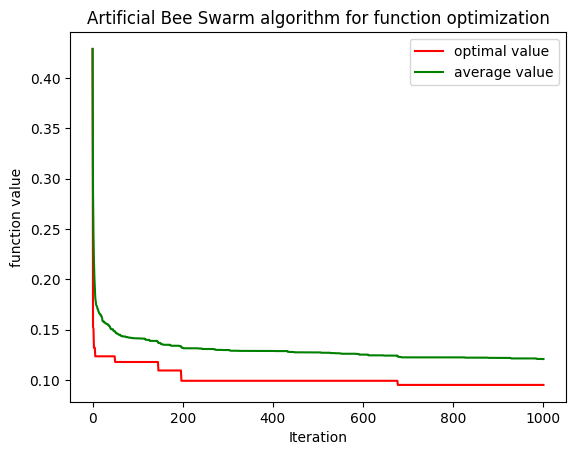

Running time: 555.7633476257324 seconds


In [21]:
# Fitness function (objective function)
def fitness(Bin,AllItem,ran):
    # ran is the packing order.
    itemNum=AllItem.shape[0] 
    BinNum=1;
    RPNXY=[];
    flagItem=np.zeros(itemNum) #Marking whether items are loaded into bin
    utilization_rates = []  
    visualizations = [] 
    
    # Start packing.
    for i in range(itemNum):
        if flagItem[ran[i]]==0:
            item=AllItem[ran[i],:]
            itemRP=Bin  
            flagOL=overlap(item,AllItem,itemRP,RPNXY) 
            if flagOL==0:
                itemRP=finalPos(item,AllItem,itemRP,RPNXY) 
                if len(itemRP)>0:
                    RPNXY.append([ran[i],itemRP[0],itemRP[1]])
                    flagItem[ran[i]]=1
    rect_area = 0
    bin_area = Bin[0]*Bin[1]
    for id in RPNXY:
        width,height = AllItem[id[0]]
        rect_area += width*height
    score = rect_area/bin_area
    print('utilisation:{}'.format(score))
    return score

#             #可视化
#             fig, ax = plt.subplots(1, 1)
#             ax1 = fig.gca()
#             for i in RPNXY:
#                 width,height = AllItem[i[0]]
#                 rx,ry = i[1],i[2]
#                 lx,ly = rx-width,ry-height
#                 plt.xlim((0, Bin[0]))
#                 plt.ylim((0, Bin[1]))
#                 color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                 rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
#                 ax1.add_patch(rect)
#             print("利用率: {}".format(utilization_rate))
#             plt.show()
#             #plt.savefig('result.png')
#     print("平均利用率: {}".format(np.mean(utilization_rates)))
            
#     if list(flagItem).count(0)<=0:
#         print("--------------------------------------物品装完---------------------------------\n")
    return score
 
class ABSIndividual:
    def __init__(self,bin,item):
        self.score = 0.
        self.invalidCount = 0 #Number of invalid counts (cumulative number of times results have not been updated)
        self.bin = bin  #Box width and height
        self.allitem = item
        self.ran =  list(range(self.allitem.shape[0]))
        self.calculateFitness()        
 
    def calculateFitness(self):
        self.score = fitness(self.bin,self.allitem,self.ran)#Calculate current score
        
class ArtificialBeeSwarm:
    def __init__(self, foodCount, onlookerCount,Bin, item, maxIterCount=1000, maxInvalidCount=200):
        self.foodCount = foodCount#Number of nectar sources, equal to the number of employed bees
        self.onlookerCount = onlookerCount#Number of onlooker bees 
        self.item = item #Upper and lower bounds for each parameter
        self.maxIterCount = maxIterCount
        self.maxInvalidCount = maxInvalidCount
        self.Bin = Bin
        #The #foodList is a list of foodCount individual bees (i.e., hired bees), each representing a solution with a different packing order.
        self.foodList = [ABSIndividual(self.Bin,self.item) for k in range(self.foodCount)]   #Initialise each nectar source
        #The foodScore is a list storing the best fitness value (score) achieved by each individual bee.
        self.foodScore = [d.score for d in self.foodList]                             #Best results by nectar source
        self.bestFood = self.foodList[np.argmax(self.foodScore)]                      #The best nectar source in the whole world
    
    #Find a suitable permutation
    def updateFood(self, i):  #Update the ith nectar source
        vi = copy.deepcopy(self.foodList[i])
        order =list(range(vi.allitem.shape[0]))
        random.shuffle(order) #Randomly generated pack sequence
        vi.ran = order
        vi.calculateFitness()
        if vi.score > self.foodList[i].score: #If the results are better than the current honey source
            self.foodList[i] = vi
            if vi.score > self.foodScore[i]:#If grades are better than history grades
                self.foodScore[i] = vi.score
                if vi.score > self.bestFood.score:#If the results are globally optimal
                    self.bestFood = vi
            self.foodList[i].invalidCount = 0
        else:
            self.foodList[i].invalidCount += 1
            
    # Implementation of the employed Bees phase
    def employedBeePhase(self):
        for i in range(0, self.foodCount):#Each nectar source is updated in turn
            self.updateFood(i)            
 
    #Implementation of the onlooker bee phase
    def onlookerBeePhase(self):
        foodScore = [d.score for d in self.foodList]  
        maxScore = np.max(foodScore)    
        #Relative scores and index numbers were obtained for each nectar source.
        accuFitness = [(0.9*d/maxScore+0.1, k) for k,d in enumerate(foodScore)]
        for k in range(0, self.onlookerCount):
            #Randomly selected from nectar sources with relative scores greater than the randomisation threshold to follow the
            i = random.choice([d[1] for d in accuFitness if d[0] >= random.random()])
            self.updateFood(i)
 
    #Implementation of the scout bee phase
    def scoutBeePhase(self):
        for i in range(0, self.foodCount):
            #If this nectar has not been updated more than the specified threshold, it is reinitialised
            if self.foodList[i].invalidCount > self.maxInvalidCount:
                self.foodList[i] = ABSIndividual(self.Bin, self.item)
                self.foodScore[i] = max(self.foodScore[i], self.foodList[i].score)
 
    #Perform a fixed number of iterations
    def solve(self):
        trace = []
        trace.append((self.bestFood.score, np.mean(self.foodScore)))
        for k in range(self.maxIterCount):
            self.employedBeePhase()
            self.onlookerBeePhase()
            self.scoutBeePhase()
            trace.append((self.bestFood.score, np.mean(self.foodScore)))
        print("Optimal utilisation:",self.bestFood.score)
        self.printResult(np.array(trace))
 
    def printResult(self, trace):
        x = np.arange(0, trace.shape[0])
        plt.plot(x, [(1-d)/d for d in trace[:, 0]], 'r', label='optimal value')
        plt.plot(x, [(1-d)/d for d in trace[:, 1]], 'g', label='average value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Artificial Bee Swarm algorithm for function optimization")
        plt.legend()
        plt.show()
 

if __name__ == "__main__":
    random.seed()
    iternum = 1000
    maxInvalidCount = 50
    abs = ArtificialBeeSwarm(30, 30, Bin, AllItem, iternum, maxInvalidCount)
    start_time = time.time()
    abs.solve()
    end_time = time.time()
    print("Running time: {} seconds".format(end_time - start_time))